In [1]:
#importamos las librerias que vamos a usar en el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statistics as stat
import scipy.stats as st
from statistics import stdev
from scipy import stats

In [4]:
#importamos la base 
base = pd.read_csv(r'C:\Users\u190850\Desktop\Python\Bases\datasets\Ciencia de datos\Base_DC.csv', sep = ';')

In [5]:
pd.options.display.max_rows
pd.options.display.max_columns = None
base

,CUIT,MOB_CUENTAS_ADELANTO,SALDO_CUENTA_ADELANTO,USA_CUENTA_ADELANTO,TIENE_TARJETA_VISA,VISA_MONTO_SALDO_RESUMEN,VISA_MONTO_SALDO_TOTAL,ANTIGUEDAD_MASTERCARD,MASTER_MONTO_SALDO_TOTAL,ANTIGUEDAD_CORDOBESA,CORDOBESA_MONTO_SALDO_TOTAL,CORDOBESA_MONTO_SALDO_RESUMEN,TIENE_TARJETA_CORDOBESA,SUM_CONSUMOS_TC_ULT_6M,CANT_TARJETAS_CREDITO,TARJETA_PREPAGA,EDAD,ESTADO_CIVIL,SEXO,ANTIGUEDAD_PRESTAMOS_PERSONALES,CANT_PMOS_PERSONALES,TASA_PMOS_PERSONALES,SALDO_PP_CAP_ORIGINAL_HISTORICO,MORA_ACTUAL_PRESTAMOS_PERSONALES,CANT_PMOS_HIPOTECARIOS,SALDO_PH_CAP_ORIGINAL_HISTORICO,MORA_ACTUAL_PH,CANT_REFINANCIACION_VIGENTES,SALDO_PR_CAP_ORIGINAL,CANT_REFINANCIACION_ULT6M,SALDO_PP_CAP_ORIGINAL,TIENE_CUENTA_BASICA,CANT_TRANSFERENCIAS_RECIBIDAS,MONTO_TRANSFERENCIAS_RECIBIDAS,TIENE_PLAZO_FIJO,MONTO_PLAZO_FIJO_PESOS,RATIO_PLAZOFIJO_PESOS_3M_6M,TRANSACCIONES_POR_ATM_LINK_CANT,CANT_CAJERO_AJENO_TRANSACCIONES,CANT_AUTOSERVICIO_TRANSACCIONES,CANT_TARJ_DEBITO_TRANSACCIONES,GYM_CORDOBESA,GYM_VISA,GYM_PMOS_PERSONALES,MORA_ACTUAL_TARJETA_VISA,MORA_ACTUAL_TARJETA_CORDOBESA,MORA_ACTUAL_TARJETA_MASTERCARD,DESTINO_PRESTAMO_PERSONAL,CONSOLIDACION_DEUDA,RIESGO_ASOCIADO_LINEA,PERIODO_PROCESO,peor_sit_bancor_3meses,peor_sit_bancor_6meses,sin_productos_activos_6meses,peor_sit_no_bancor_3meses,peor_sit_no_bancor_6meses,cant_saldos_6meses,mob_cliente_meses,ANTIGUEDAD_TC,ANTIGUEDAD_VS,SITUACION_BANCOR2,SITUACION_NO_BANCOR2,meses_ult_sit_bancor_mayor1,meses_ult_sit_nobancor_mayor1,cant_sit_no_bancor_mayor1,cant_sit_bancor_mayor1,antiguedad_productos,Excluidos,tiene_saldo_prox12m,indeterminados,target
0,eee08d0138b9cfdb73eed281e2f38f24,0,0.0,0,0,0.00000,0.000000,0,0.0,120,0.000000,0.000000,1,0.000000,0,0,85,Viudo/a,FEMENINO,0,0,0.0,0.00000,0,0,0.0,0,0,0.0,0,0.0,0,0,0.0,0,0.000000e+00,0.000,0,0,0,0,0,0,0,0,0,0,Sin préstamos personales,Sin consolidación,Sin préstamos personales,201905,1,1,0,1,1,3,160.0,52.0,NaN,0,1,-1,-1,0,0,52,0,0,1,0
1,a704d6c50813a91fa528ae72cce808d9,0,0.0,0,0,0.00000,0.000000,0,0.0,118,13403.020000,10279.500000,1,45122.400000,1,0,80,Casado/a,MASCULINO,0,0,0.0,0.00000,0,0,0.0,0,0,0.0,0,0.0,0,0,0.0,1,9.256815e+05,0.527,0,0,0,0,0,0,0,0,0,0,Sin préstamos personales,Sin consolidación,Sin préstamos personales,201905,1,1,0,1,1,6,772.0,52.0,NaN,1,1,-1,-1,0,0,52,0,1,0,1
2,0c69ef0ac45666ed3def4ae23de203bd,82,0.0,0,1,6020.85791,13544.275582,0,0.0,117,11086.442478,9679.424197,1,74652.223387,2,1,74,Casado/a,FEMENINO,23,1,26.0,444348.39167,0,0,0.0,0,0,0.0,0,0.0,0,0,0.0,1,4.699743e+06,0.507,11,4,11,38,0,0,0,0,0,0,Con destino,Consolidación PP,Bajo,201906,1,1,0,1,1,6,773.0,53.0,53.0,1,0,-1,-1,0,0,53,0,1,0,0
3,6cec93f6c6ea6e1b209ad837d51eea24,0,0.0,0,0,0.00000,0.000000,0,0.0,50,16397.910000,14131.850000,1,76290.560000,1,0,70,Casado/a,MASCULINO,0,0,0.0,0.00000,0,0,0.0,0,0,0.0,0,0.0,1,0,0.0,0,0.000000e+00,0.000,1,0,1,0,0,0,0,0,0,0,Sin préstamos personales,Sin consolidación,Sin préstamos personales,201904,1,1,0,1,1,6,272.0,47.0,NaN,1,1,-1,-1,0,0,47,0,1,0,0
4,4fa2a3812acbbc670e9b99d40e6dd3ec,0,0.0,0,0,0.00000,0.000000,0,0.0,116,0.000000,0.000000,1,876.335422,0,0,72,Soltero/a,FEMENINO,0,0,0.0,0.00000,0,0,0.0,0,0,0.0,0,0.0,0,0,0.0,0,0.000000e+00,0.000,0,0,0,0,0,0,0,0,0,0,Sin préstamos personales,Sin consolidación,Sin préstamos personales,201903,1,1,0,1,1,3,164.0,50.0,NaN,0,1,-1,-1,0,0,50,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92405,c40aff328c565f08db00d267c7f138ac,0,0.0,0,0,0.00000,0.000000,0,0.0,8,3072.000000,1807.000000,1,8555.000000,1,0,24,Soltero/a,FEMENINO,0,0,0.0,0.00000,0,0,0.0,0,0,0.0,0,0.0,0,0,0.0,0,0.000000e+00,0.000,0,1,1,0,0,0,0,0,1,0,Sin préstamos personales,Sin consolidación,Sin préstamos personales,201912,1,1,0,0,0,5,7.0,6.0,NaN,1,0,-1,-1,0,0,6,0,1,0,0
92406,5e983c02a70f2cc6c6b470d92f5519a0,0,0.0,0,0,0.00000,0.0000

In [7]:
#Me quedo solo con las variables tipo numericas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numbase = base.select_dtypes(include=numerics)

In [8]:
base

,CUIT,MOB_CUENTAS_ADELANTO,SALDO_CUENTA_ADELANTO,USA_CUENTA_ADELANTO,TIENE_TARJETA_VISA,VISA_MONTO_SALDO_RESUMEN,VISA_MONTO_SALDO_TOTAL,ANTIGUEDAD_MASTERCARD,MASTER_MONTO_SALDO_TOTAL,ANTIGUEDAD_CORDOBESA,CORDOBESA_MONTO_SALDO_TOTAL,CORDOBESA_MONTO_SALDO_RESUMEN,TIENE_TARJETA_CORDOBESA,SUM_CONSUMOS_TC_ULT_6M,CANT_TARJETAS_CREDITO,TARJETA_PREPAGA,EDAD,ESTADO_CIVIL,SEXO,ANTIGUEDAD_PRESTAMOS_PERSONALES,CANT_PMOS_PERSONALES,TASA_PMOS_PERSONALES,SALDO_PP_CAP_ORIGINAL_HISTORICO,MORA_ACTUAL_PRESTAMOS_PERSONALES,CANT_PMOS_HIPOTECARIOS,SALDO_PH_CAP_ORIGINAL_HISTORICO,MORA_ACTUAL_PH,CANT_REFINANCIACION_VIGENTES,SALDO_PR_CAP_ORIGINAL,CANT_REFINANCIACION_ULT6M,SALDO_PP_CAP_ORIGINAL,TIENE_CUENTA_BASICA,CANT_TRANSFERENCIAS_RECIBIDAS,MONTO_TRANSFERENCIAS_RECIBIDAS,TIENE_PLAZO_FIJO,MONTO_PLAZO_FIJO_PESOS,RATIO_PLAZOFIJO_PESOS_3M_6M,TRANSACCIONES_POR_ATM_LINK_CANT,CANT_CAJERO_AJENO_TRANSACCIONES,CANT_AUTOSERVICIO_TRANSACCIONES,CANT_TARJ_DEBITO_TRANSACCIONES,GYM_CORDOBESA,GYM_VISA,GYM_PMOS_PERSONALES,MORA_ACTUAL_TARJETA_VISA,MORA_ACTUAL_TARJETA_CORDOBESA,MORA_ACTUAL_TARJETA_MASTERCARD,DESTINO_PRESTAMO_PERSONAL,CONSOLIDACION_DEUDA,RIESGO_ASOCIADO_LINEA,PERIODO_PROCESO,peor_sit_bancor_3meses,peor_sit_bancor_6meses,sin_productos_activos_6meses,peor_sit_no_bancor_3meses,peor_sit_no_bancor_6meses,cant_saldos_6meses,mob_cliente_meses,ANTIGUEDAD_TC,ANTIGUEDAD_VS,SITUACION_BANCOR2,SITUACION_NO_BANCOR2,meses_ult_sit_bancor_mayor1,meses_ult_sit_nobancor_mayor1,cant_sit_no_bancor_mayor1,cant_sit_bancor_mayor1,antiguedad_productos,Excluidos,tiene_saldo_prox12m,indeterminados,target
0,eee08d0138b9cfdb73eed281e2f38f24,0,0.0,0,0,0.00000,0.000000,0,0.0,120,0.000000,0.000000,1,0.000000,0,0,85,Viudo/a,FEMENINO,0,0,0.0,0.00000,0,0,0.0,0,0,0.0,0,0.0,0,0,0.0,0,0.000000e+00,0.000,0,0,0,0,0,0,0,0,0,0,Sin préstamos personales,Sin consolidación,Sin préstamos personales,201905,1,1,0,1,1,3,160.0,52.0,NaN,0,1,-1,-1,0,0,52,0,0,1,0
1,a704d6c50813a91fa528ae72cce808d9,0,0.0,0,0,0.00000,0.000000,0,0.0,118,13403.020000,10279.500000,1,45122.400000,1,0,80,Casado/a,MASCULINO,0,0,0.0,0.00000,0,0,0.0,0,0,0.0,0,0.0,0,0,0.0,1,9.256815e+05,0.527,0,0,0,0,0,0,0,0,0,0,Sin préstamos personales,Sin consolidación,Sin préstamos personales,201905,1,1,0,1,1,6,772.0,52.0,NaN,1,1,-1,-1,0,0,52,0,1,0,1
2,0c69ef0ac45666ed3def4ae23de203bd,82,0.0,0,1,6020.85791,13544.275582,0,0.0,117,11086.442478,9679.424197,1,74652.223387,2,1,74,Casado/a,FEMENINO,23,1,26.0,444348.39167,0,0,0.0,0,0,0.0,0,0.0,0,0,0.0,1,4.699743e+06,0.507,11,4,11,38,0,0,0,0,0,0,Con destino,Consolidación PP,Bajo,201906,1,1,0,1,1,6,773.0,53.0,53.0,1,0,-1,-1,0,0,53,0,1,0,0
3,6cec93f6c6ea6e1b209ad837d51eea24,0,0.0,0,0,0.00000,0.000000,0,0.0,50,16397.910000,14131.850000,1,76290.560000,1,0,70,Casado/a,MASCULINO,0,0,0.0,0.00000,0,0,0.0,0,0,0.0,0,0.0,1,0,0.0,0,0.000000e+00,0.000,1,0,1,0,0,0,0,0,0,0,Sin préstamos personales,Sin consolidación,Sin préstamos personales,201904,1,1,0,1,1,6,272.0,47.0,NaN,1,1,-1,-1,0,0,47,0,1,0,0
4,4fa2a3812acbbc670e9b99d40e6dd3ec,0,0.0,0,0,0.00000,0.000000,0,0.0,116,0.000000,0.000000,1,876.335422,0,0,72,Soltero/a,FEMENINO,0,0,0.0,0.00000,0,0,0.0,0,0,0.0,0,0.0,0,0,0.0,0,0.000000e+00,0.000,0,0,0,0,0,0,0,0,0,0,Sin préstamos personales,Sin consolidación,Sin préstamos personales,201903,1,1,0,1,1,3,164.0,50.0,NaN,0,1,-1,-1,0,0,50,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92405,c40aff328c565f08db00d267c7f138ac,0,0.0,0,0,0.00000,0.000000,0,0.0,8,3072.000000,1807.000000,1,8555.000000,1,0,24,Soltero/a,FEMENINO,0,0,0.0,0.00000,0,0,0.0,0,0,0.0,0,0.0,0,0,0.0,0,0.000000e+00,0.000,0,1,1,0,0,0,0,0,1,0,Sin préstamos personales,Sin consolidación,Sin préstamos personales,201912,1,1,0,0,0,5,7.0,6.0,NaN,1,0,-1,-1,0,0,6,0,1,0,0
92406,5e983c02a70f2cc6c6b470d92f5519a0,0,0.0,0,0,0.00000,0.0000

In [9]:
#Vemos las caracteristicas de la base 
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92410 entries, 0 to 92409
Data columns (total 71 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUIT                              92410 non-null  object 
 1   MOB_CUENTAS_ADELANTO              92410 non-null  int64  
 2   SALDO_CUENTA_ADELANTO             92410 non-null  float64
 3   USA_CUENTA_ADELANTO               92410 non-null  int64  
 4   TIENE_TARJETA_VISA                92410 non-null  int64  
 5   VISA_MONTO_SALDO_RESUMEN          92410 non-null  float64
 6   VISA_MONTO_SALDO_TOTAL            92410 non-null  float64
 7   ANTIGUEDAD_MASTERCARD             92410 non-null  int64  
 8   MASTER_MONTO_SALDO_TOTAL          92410 non-null  float64
 9   ANTIGUEDAD_CORDOBESA              92410 non-null  int64  
 10  CORDOBESA_MONTO_SALDO_TOTAL       92410 non-null  float64
 11  CORDOBESA_MONTO_SALDO_RESUMEN     92410 non-null  float64
 12  TIEN

In [7]:
#Analizamos los estadisticos basicos de las variables numericas
base.describe()

,MOB_CUENTAS_ADELANTO,SALDO_CUENTA_ADELANTO,USA_CUENTA_ADELANTO,TIENE_TARJETA_VISA,VISA_MONTO_SALDO_RESUMEN,VISA_MONTO_SALDO_TOTAL,ANTIGUEDAD_MASTERCARD,MASTER_MONTO_SALDO_TOTAL,ANTIGUEDAD_CORDOBESA,CORDOBESA_MONTO_SALDO_TOTAL,CORDOBESA_MONTO_SALDO_RESUMEN,TIENE_TARJETA_CORDOBESA,SUM_CONSUMOS_TC_ULT_6M,CANT_TARJETAS_CREDITO,TARJETA_PREPAGA,EDAD,ANTIGUEDAD_PRESTAMOS_PERSONALES,CANT_PMOS_PERSONALES,TASA_PMOS_PERSONALES,SALDO_PP_CAP_ORIGINAL_HISTORICO,MORA_ACTUAL_PRESTAMOS_PERSONALES,CANT_PMOS_HIPOTECARIOS,SALDO_PH_CAP_ORIGINAL_HISTORICO,MORA_ACTUAL_PH,CANT_REFINANCIACION_VIGENTES,SALDO_PR_CAP_ORIGINAL,CANT_REFINANCIACION_ULT6M,SALDO_PP_CAP_ORIGINAL,TIENE_CUENTA_BASICA,CANT_TRANSFERENCIAS_RECIBIDAS,MONTO_TRANSFERENCIAS_RECIBIDAS,TIENE_PLAZO_FIJO,MONTO_PLAZO_FIJO_PESOS,RATIO_PLAZOFIJO_PESOS_3M_6M,TRANSACCIONES_POR_ATM_LINK_CANT,CANT_CAJERO_AJENO_TRANSACCIONES,CANT_AUTOSERVICIO_TRANSACCIONES,CANT_TARJ_DEBITO_TRANSACCIONES,GYM_CORDOBESA,GYM_VISA,GYM_PMOS_PERSONALES,MORA_ACTUAL_TARJETA_VISA,MORA_ACTUAL_TARJETA_CORDOBESA,MORA_ACTUAL_TARJETA_MASTERCARD,PERIODO_PROCESO,peor_sit_bancor_3meses,peor_sit_bancor_6meses,sin_productos_activos_6meses,peor_sit_no_bancor_3meses,peor_sit_no_bancor_6meses,cant_saldos_6meses,mob_cliente_meses,ANTIGUEDAD_TC,ANTIGUEDAD_VS,SITUACION_BANCOR2,SITUACION_NO_BANCOR2,meses_ult_sit_bancor_mayor1,meses_ult_sit_nobancor_mayor1,cant_sit_no_bancor_mayor1,cant_sit_bancor_mayor1,antiguedad_productos,Excluidos,tiene_saldo_prox12m,indeterminados,target
count,92410.000000,92410.000000,92410.000000,92410.000000,9.241000e+04,9.241000e+04,92410.000000,92410.000000,92410.000000,9.241000e+04,92410.000000,92410.000000,9.241000e+04,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,9.241000e+04,92410.000000,92410.000000,9.241000e+04,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,9.241000e+04,92410.000000,9.241000e+04,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.0,92410.0,92410.0,92410.00000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92375.000000,88617.000000,5703.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.0,92410.000000,92410.000000,92410.000000
mean,8.327432,-4.799020,0.002738,0.070295,4.231609e+02,5.664281e+02,2.312445,1.765888,83.249443,1.847211e+04,6479.221391,0.965372,2.689290e+04,0.904978,0.048393,50.256347,1.892739,0.106450,3.280190,1.266803e+04,1.140266,0.007781,8.929774e+03,0.032442,0.000400,19.996138,0.000032,4972.698429,0.182275,0.102727,2.450887e+03,0.068997,7.920937e+04,0.029075,1.434682,0.127465,1.315594,0.802705,0.0,0.0,0.0,0.14545,3.286257,0.002965,201906.526058,1.059885,1.104772,0.000833,0.922649,0.975392,5.235873,157.795464,44.711489,41.301420,0.948793,0.873726,0.390304,0.316632,0.901926,0.390596,44.460740,0.0,0.976961,0.063976,0.108506
std,26.717062,180.072402,0.052253,0.255646,2.374532e+04,2.397141e+04,19.580945,124.010816,42.857922,3.212204e+04,12324.821180,0.182837,3.457341e+04,0.398579,0.214596,13.079972,7.225558,0.422093,11.737503,4.327113e+04,7.546820,0.088110,1.169820e+05,1.205496,0.020006,1090.170617,0.005698,24110.814728,0.386073,0.738878,5.195204e+04,0.253450,9.987452e+05,0.139902,4.354000,0.753753,4.060569,4.213012,0.0,0.0,0.0,2.49565,11.345724,0.312169,3.628476,0.314644,0.339094,0.028854,0.739107,0.778837,0.943683,106.640647,15.653791,15.502225,0.362986,0.713513,4.202833,4.123484,2.942064,1.214688,15.592544,0.0,0.150027,0.244711,0.311020
min,0.000000,-17107.771920,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-15846.693510,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,201901.000

In [10]:
#Vemos las caracteristicas de la base 
numbase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92410 entries, 0 to 92409
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MOB_CUENTAS_ADELANTO              92410 non-null  int64  
 1   SALDO_CUENTA_ADELANTO             92410 non-null  float64
 2   USA_CUENTA_ADELANTO               92410 non-null  int64  
 3   TIENE_TARJETA_VISA                92410 non-null  int64  
 4   VISA_MONTO_SALDO_RESUMEN          92410 non-null  float64
 5   VISA_MONTO_SALDO_TOTAL            92410 non-null  float64
 6   ANTIGUEDAD_MASTERCARD             92410 non-null  int64  
 7   MASTER_MONTO_SALDO_TOTAL          92410 non-null  float64
 8   ANTIGUEDAD_CORDOBESA              92410 non-null  int64  
 9   CORDOBESA_MONTO_SALDO_TOTAL       92410 non-null  float64
 10  CORDOBESA_MONTO_SALDO_RESUMEN     92410 non-null  float64
 11  TIENE_TARJETA_CORDOBESA           92410 non-null  int64  
 12  SUM_

In [16]:
# Se analiza presencia de valores outliers para variables: 

In [17]:
#Definimos la funcion para calcular el valor Z y ver los OUTLIER
def ver_outliers(variable):
    #calculamos el zscore
    j = np.abs(stats.zscore( numbase[variable]))
    #Definimos los outliers
    may = np.where(j > 3)
    #convertimos la tupla en array
    x = []
    for item in may:
        x.extend(item)    
    return x

In [20]:
for col in numbase :
    x = ver_outliers(col)
    print('La variable : ' + col + ' tiene ' + str(len(x)) + ' valores atipicos')

La variable : MOB_CUENTAS_ADELANTO tiene 2967 valores atipicos
La variable : SALDO_CUENTA_ADELANTO tiene 116 valores atipicos
La variable : USA_CUENTA_ADELANTO tiene 253 valores atipicos
La variable : TIENE_TARJETA_VISA tiene 6496 valores atipicos
La variable : VISA_MONTO_SALDO_RESUMEN tiene 47 valores atipicos
La variable : VISA_MONTO_SALDO_TOTAL tiene 84 valores atipicos
La variable : ANTIGUEDAD_MASTERCARD tiene 1421 valores atipicos
La variable : MASTER_MONTO_SALDO_TOTAL tiene 80 valores atipicos
La variable : ANTIGUEDAD_CORDOBESA tiene 0 valores atipicos
La variable : CORDOBESA_MONTO_SALDO_TOTAL tiene 1492 valores atipicos
La variable : CORDOBESA_MONTO_SALDO_RESUMEN tiene 1373 valores atipicos
La variable : TIENE_TARJETA_CORDOBESA tiene 3200 valores atipicos
La variable : SUM_CONSUMOS_TC_ULT_6M tiene 1497 valores atipicos
La variable : CANT_TARJETAS_CREDITO tiene 46 valores atipicos
La variable : TARJETA_PREPAGA tiene 4472 valores atipicos
La variable : EDAD tiene 65 valores atipic

In [ ]:
# Se añaden gráficos de bloxplot para visualizar valores extremos

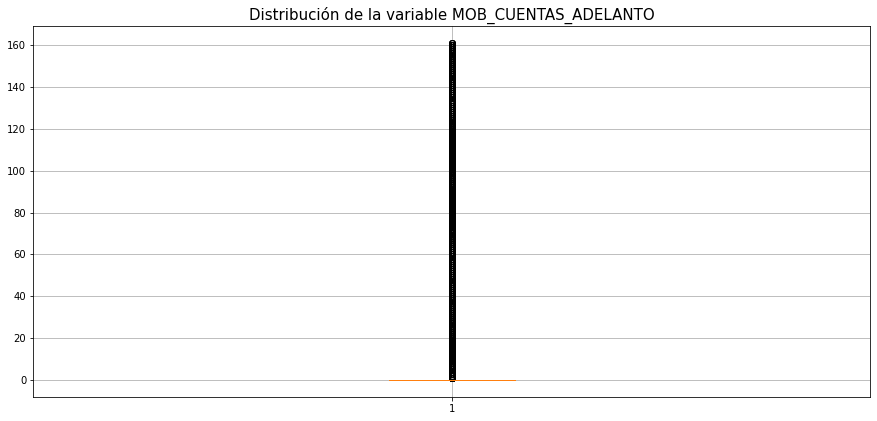

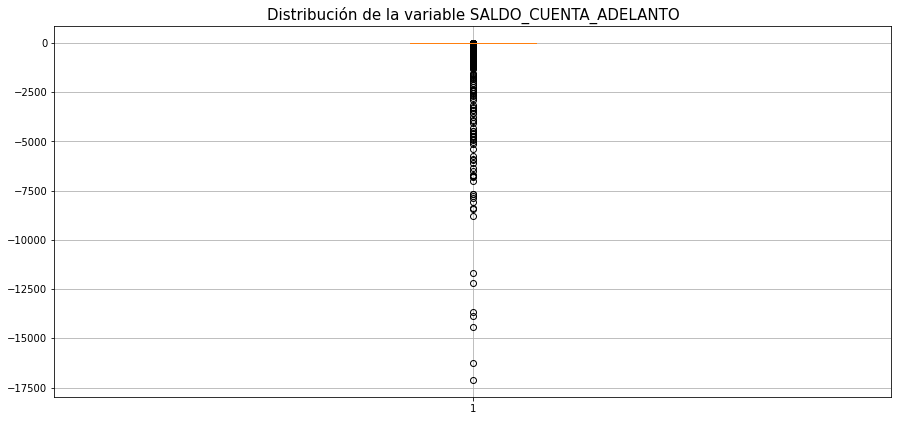

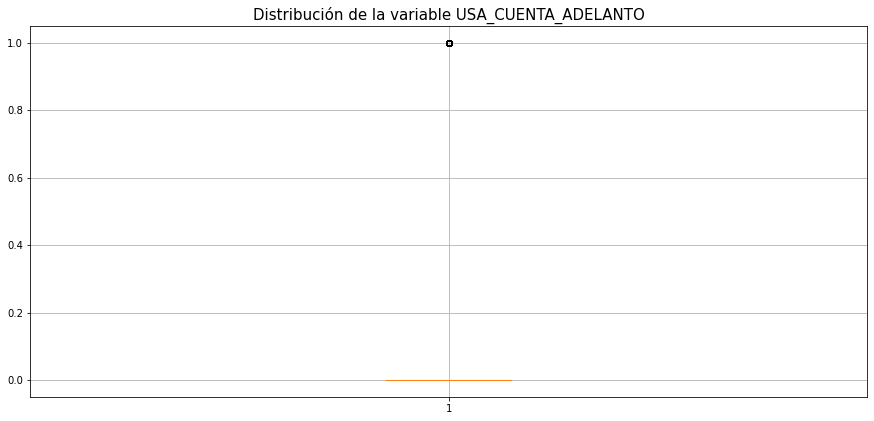

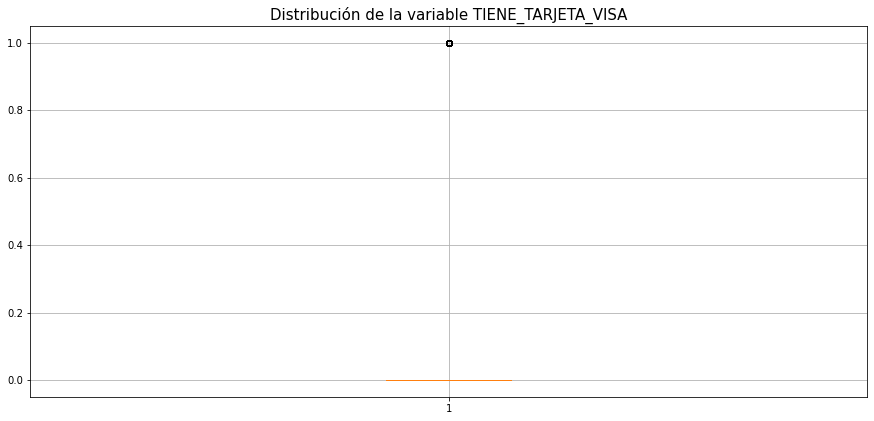

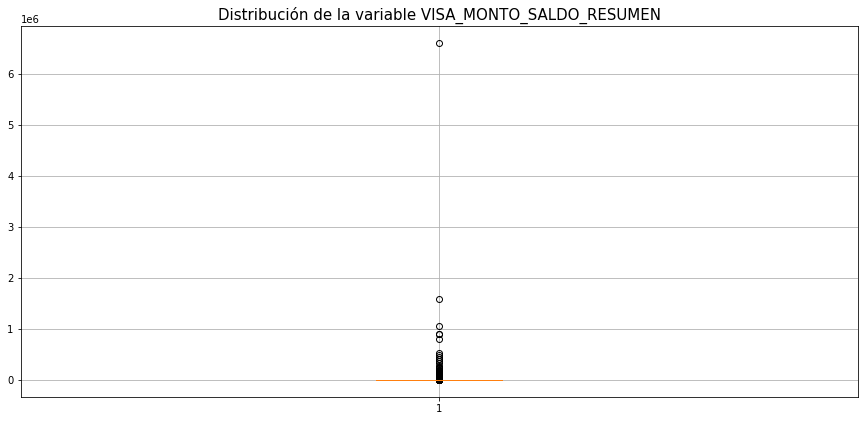

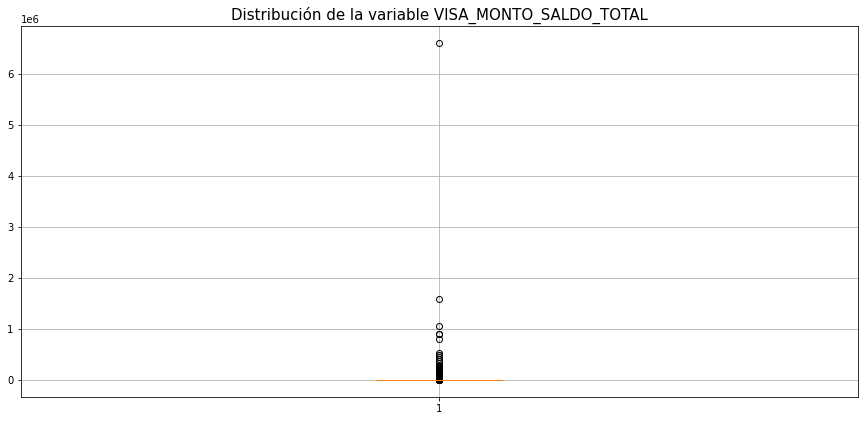

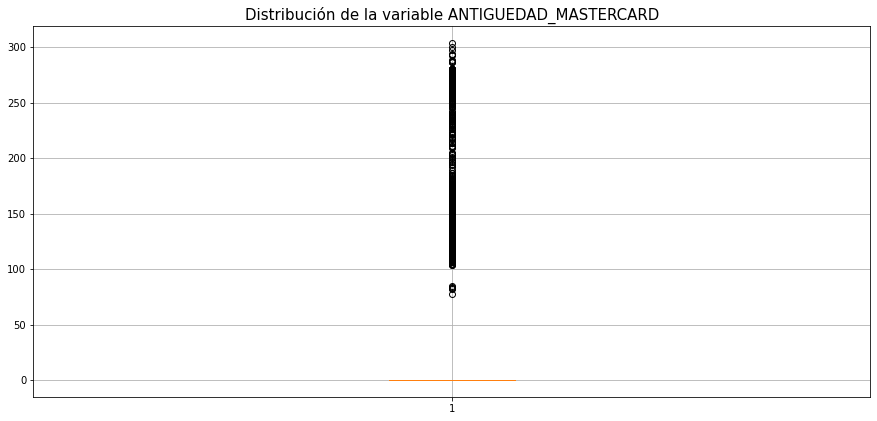

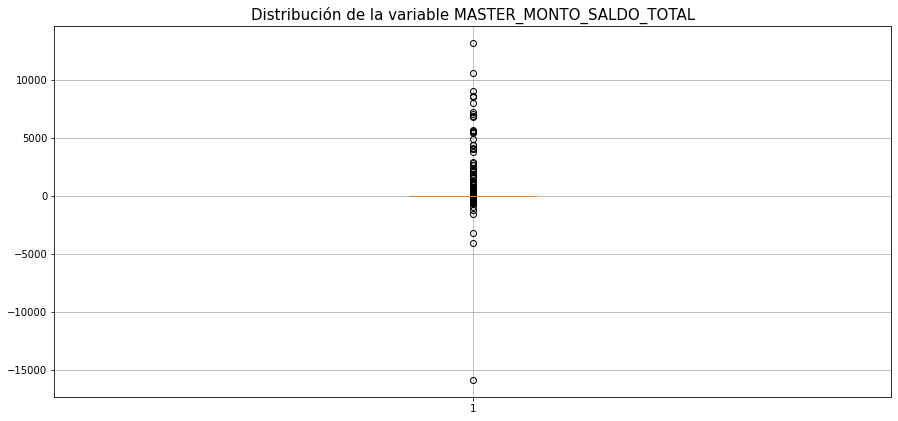

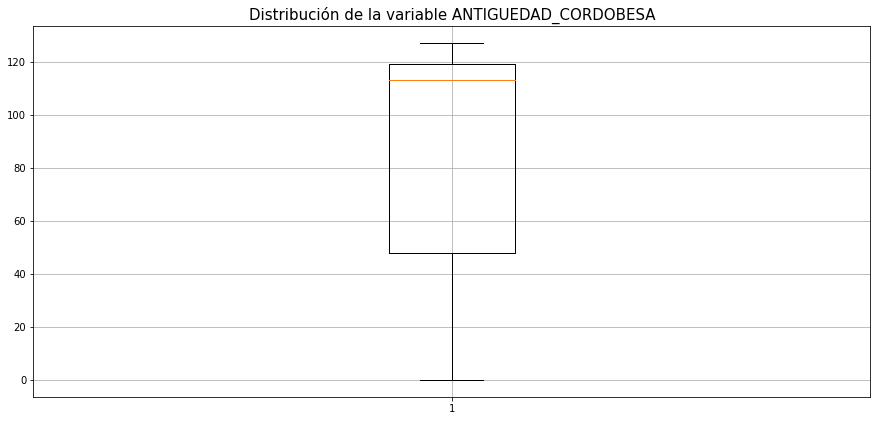

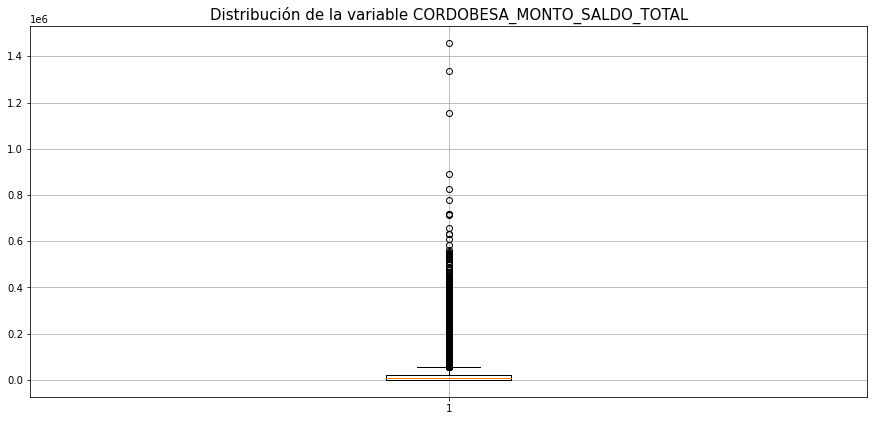

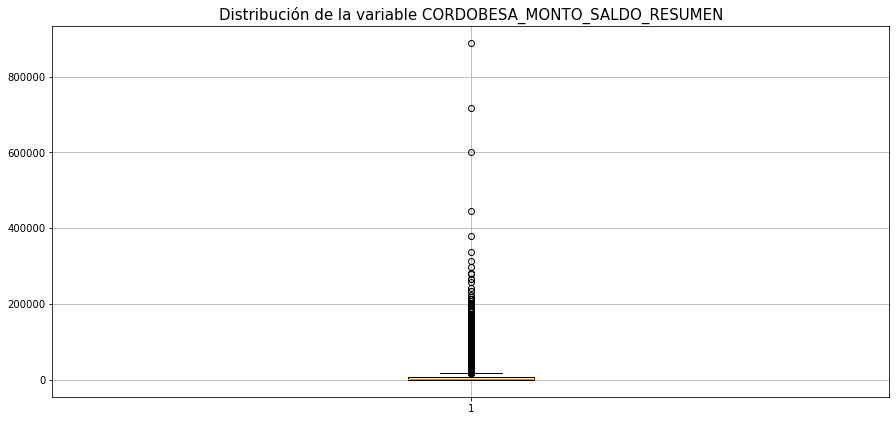

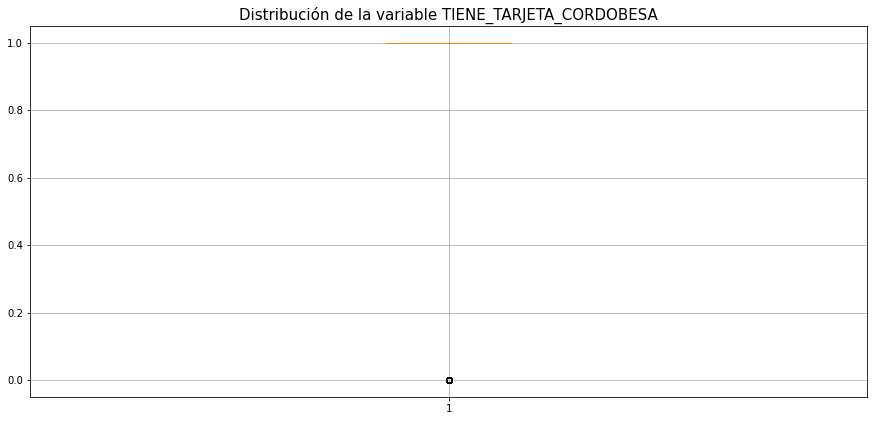

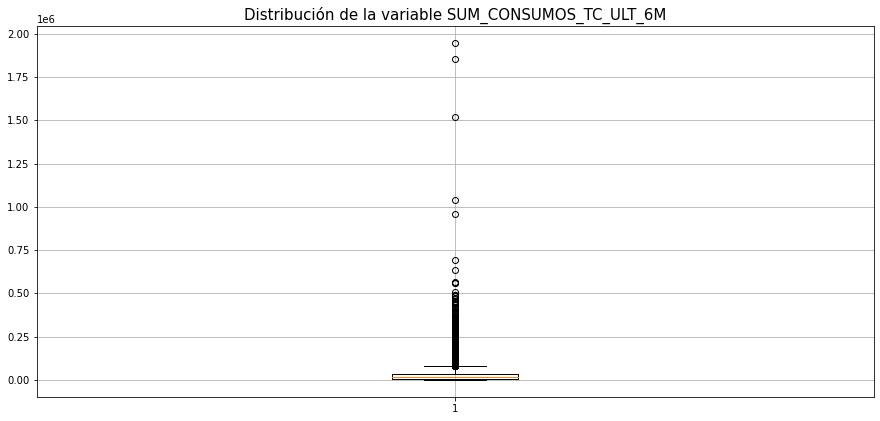

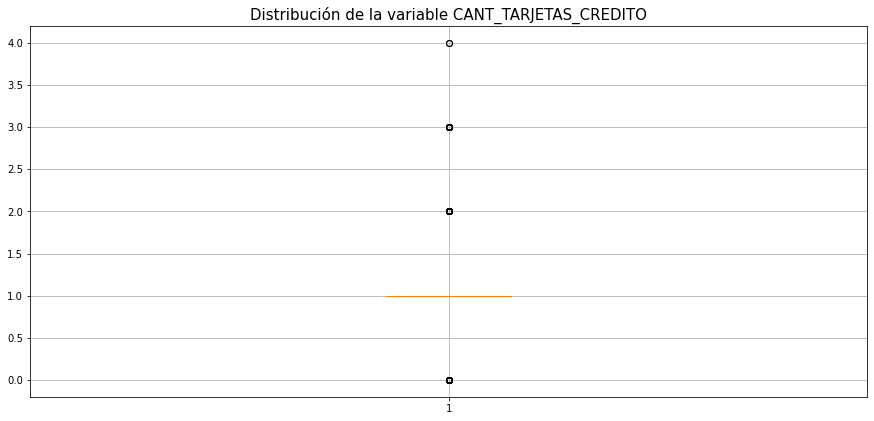

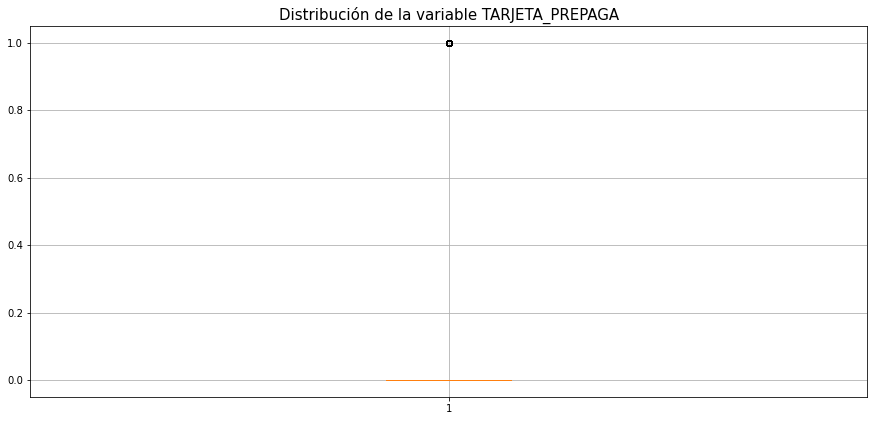

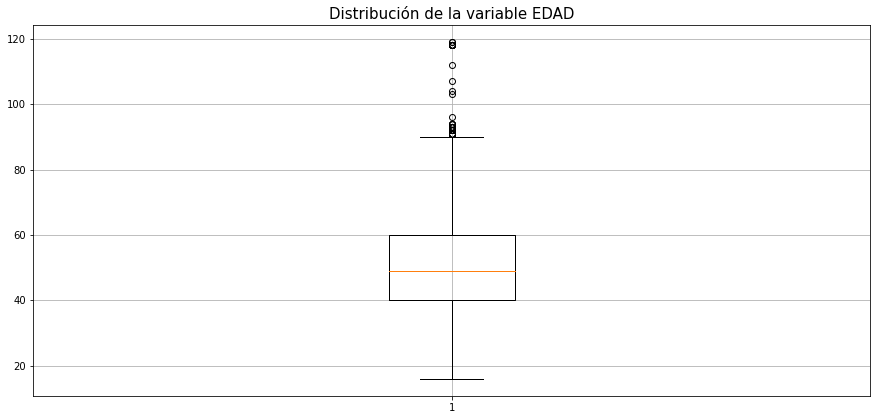

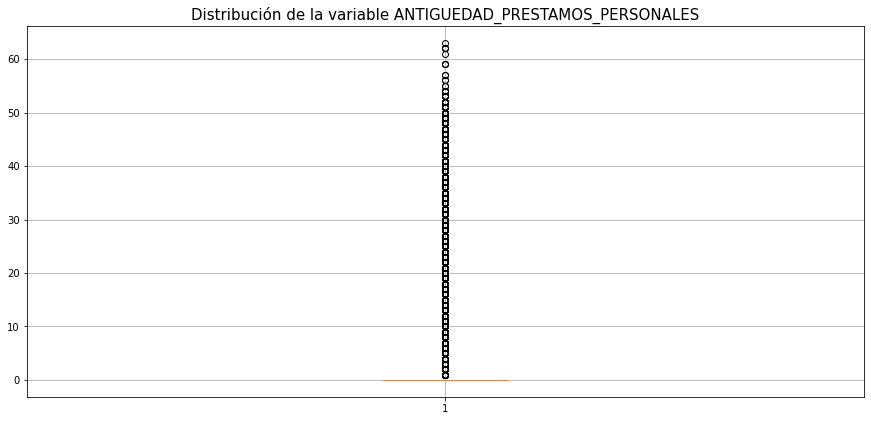

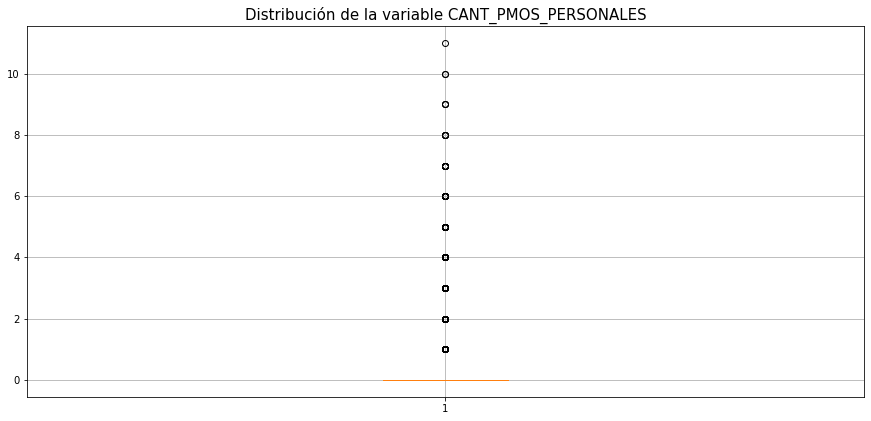

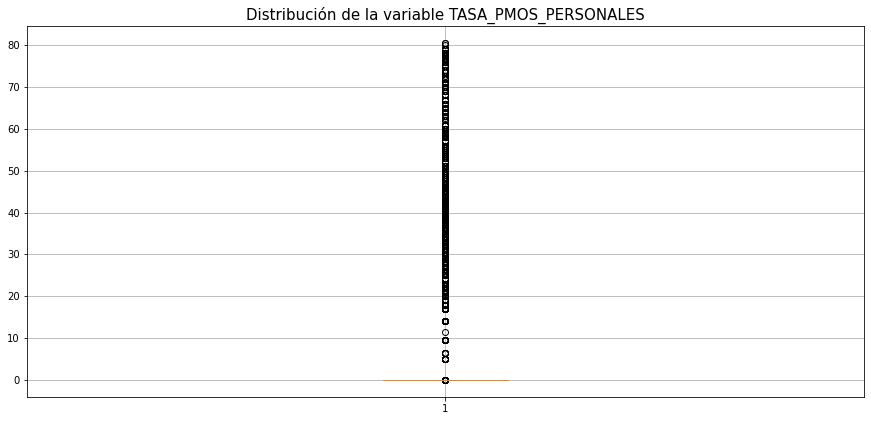

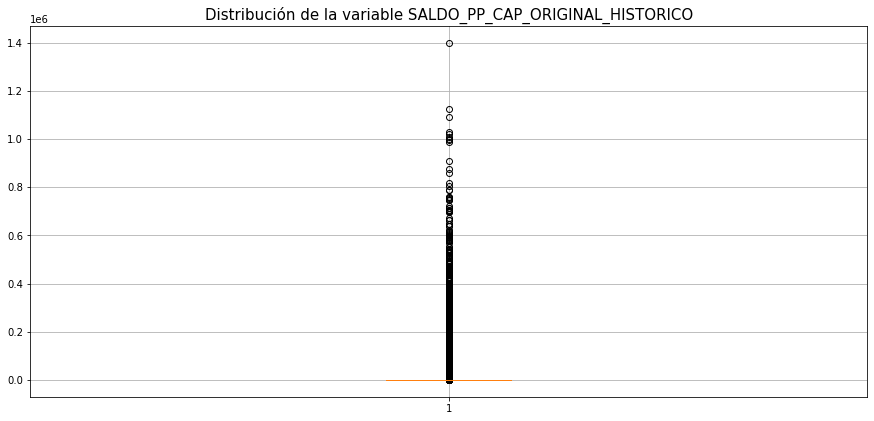

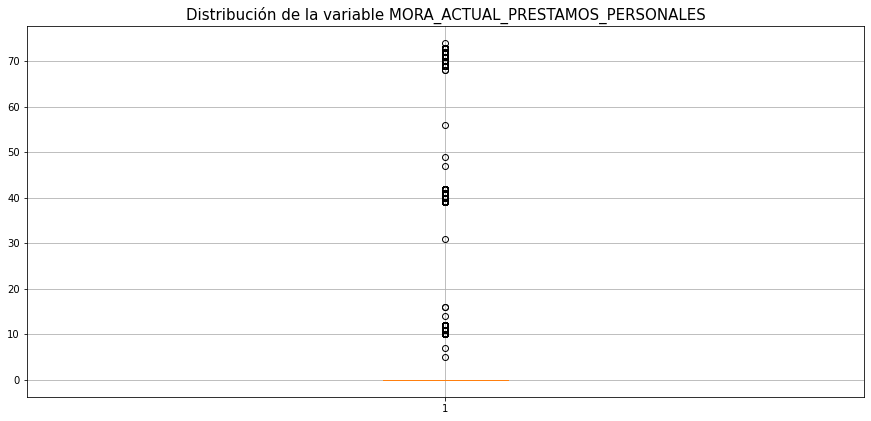

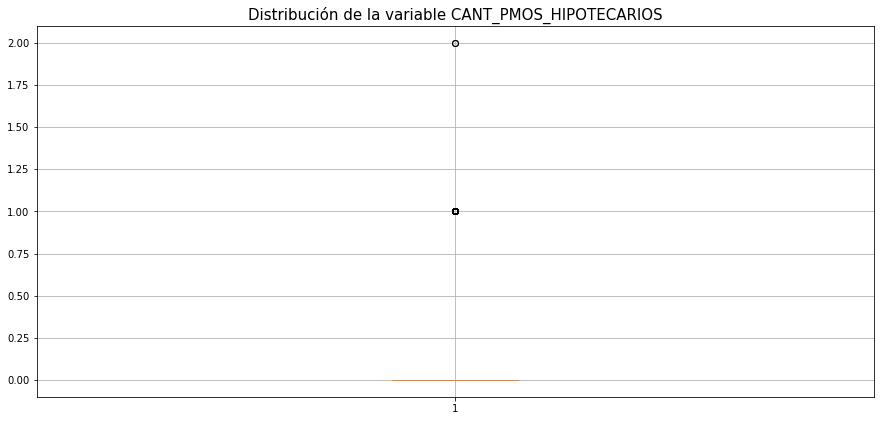

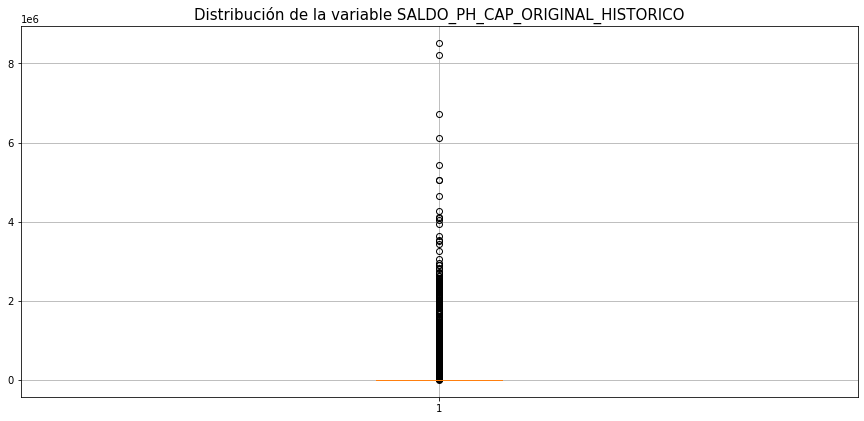

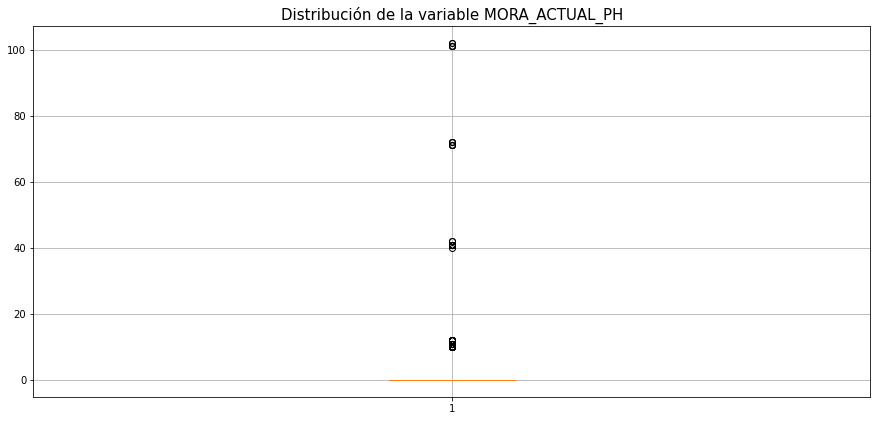

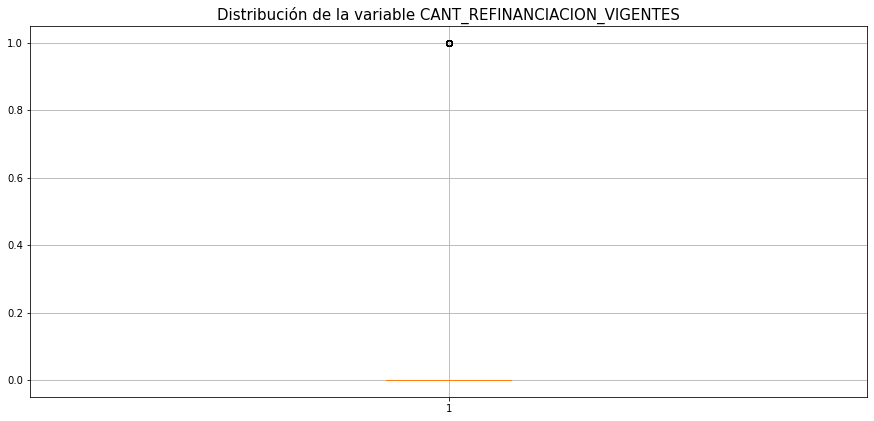

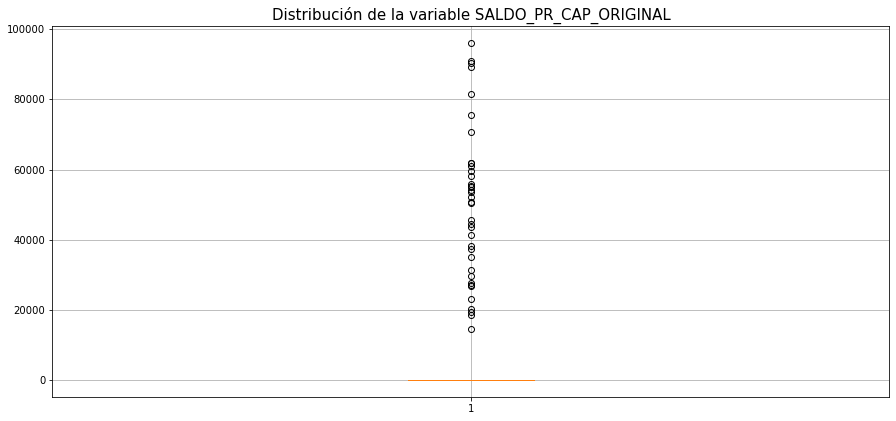

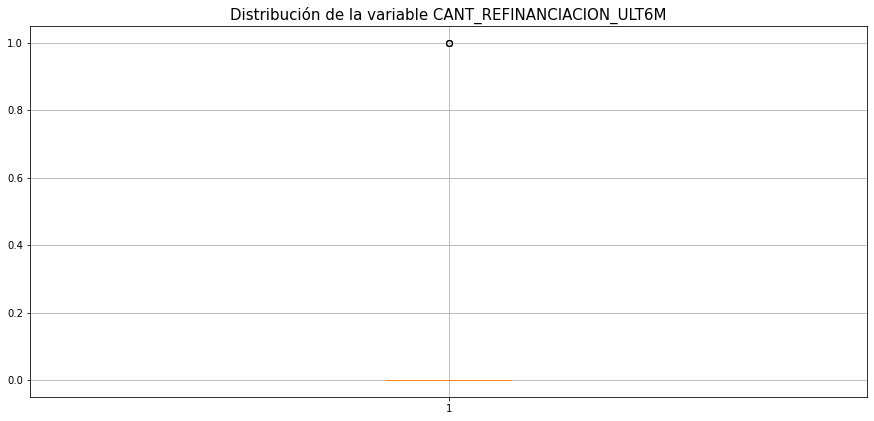

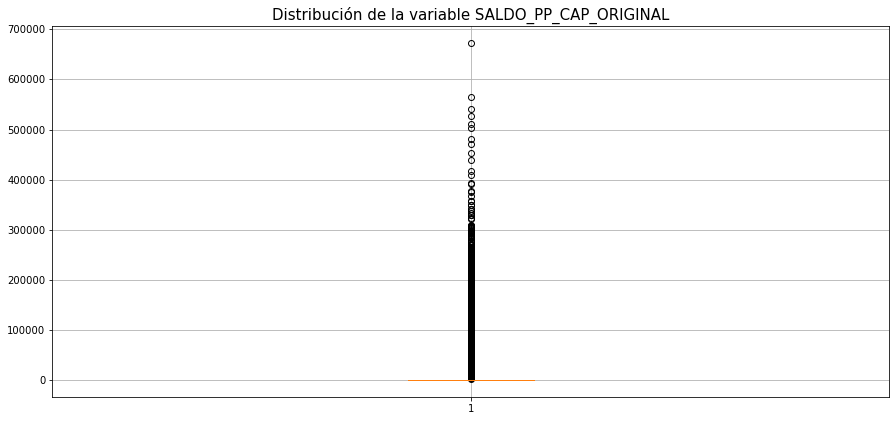

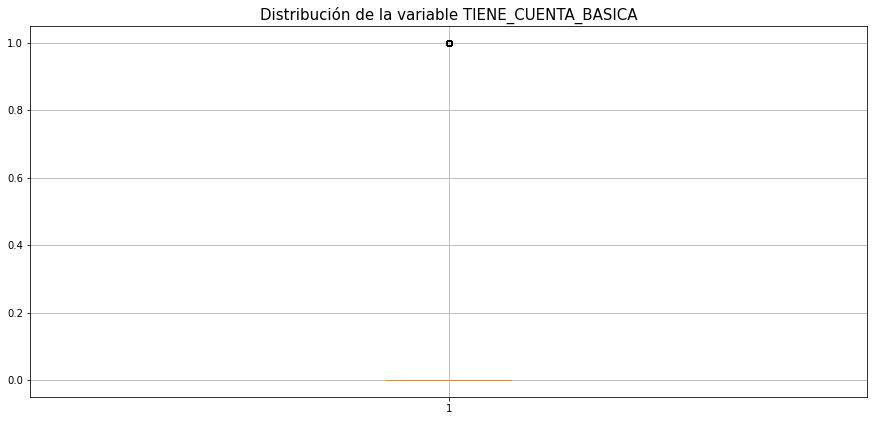

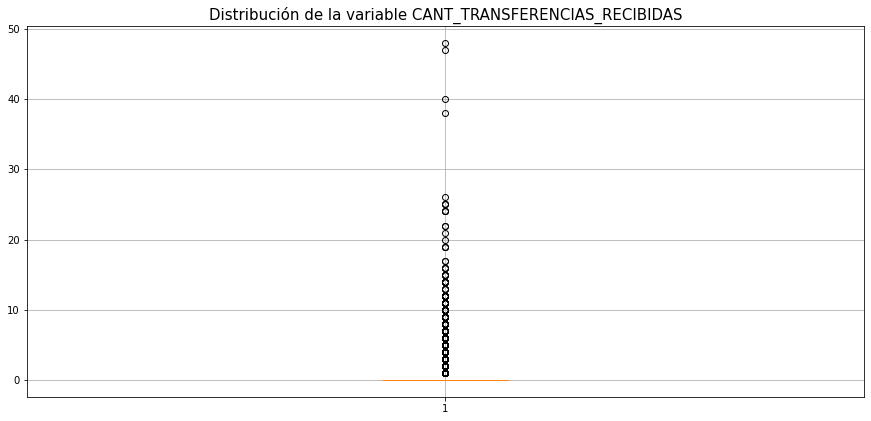

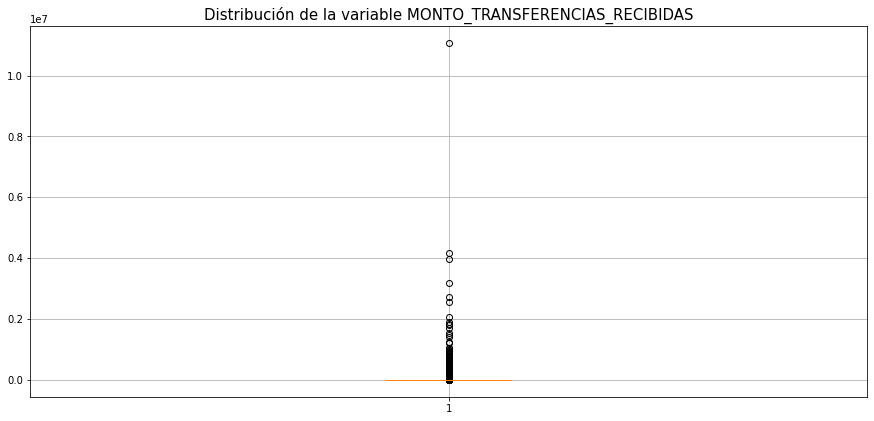

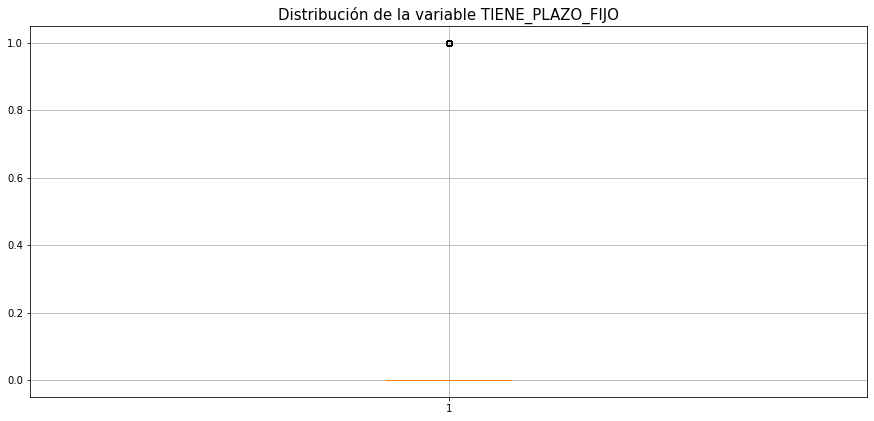

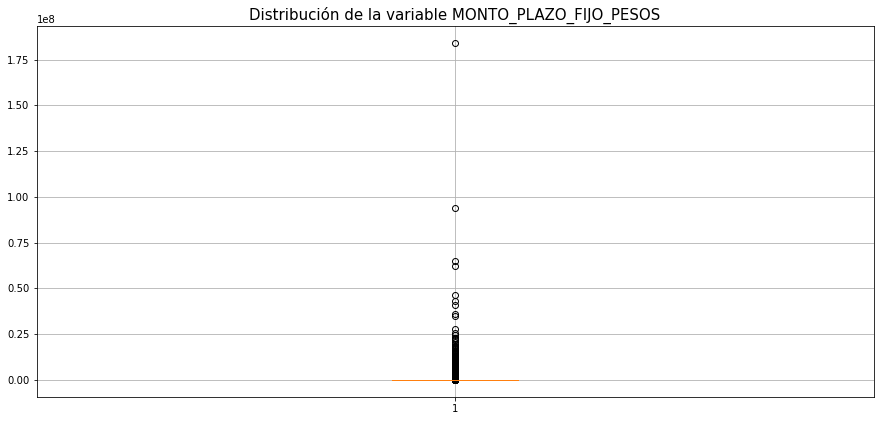

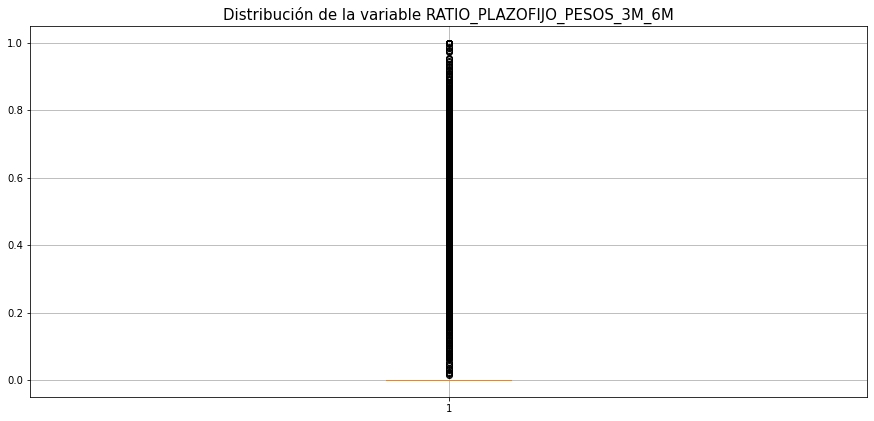

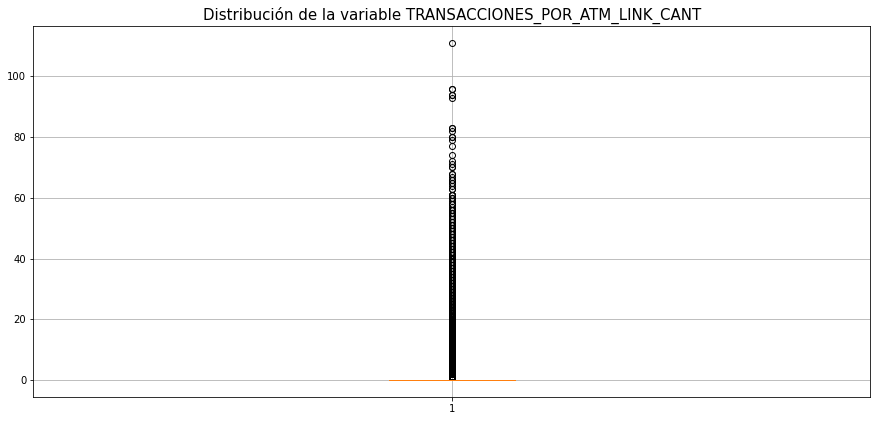

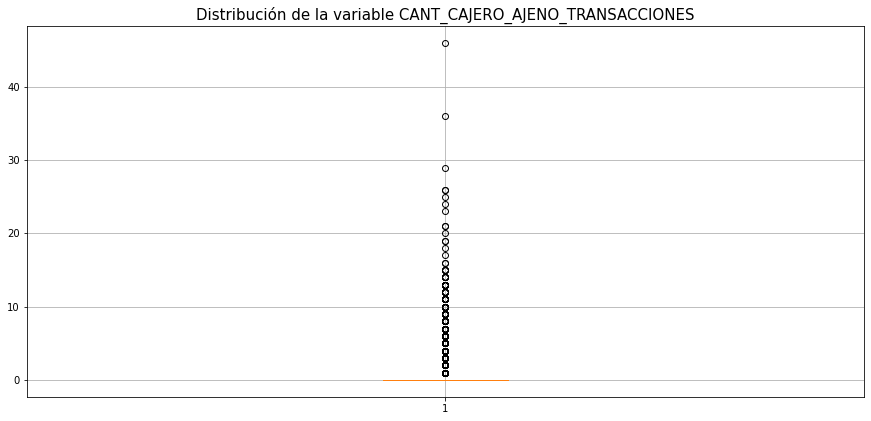

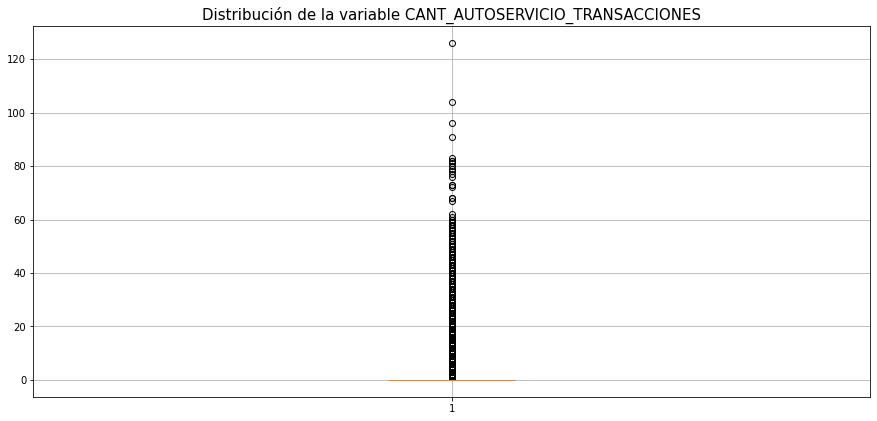

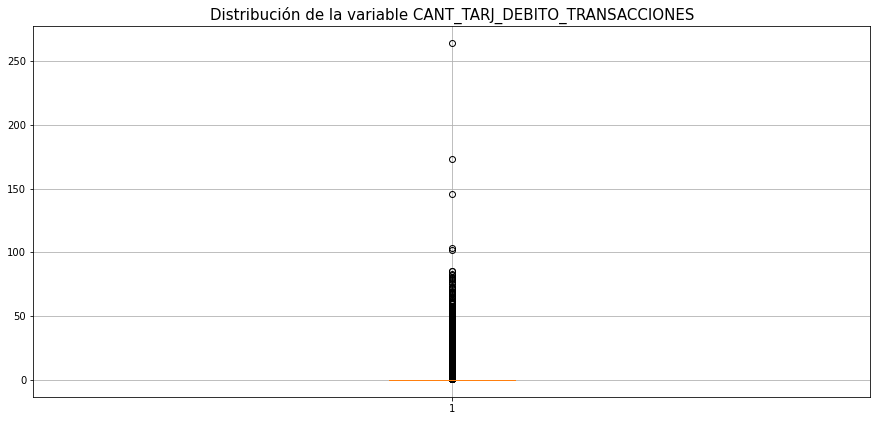

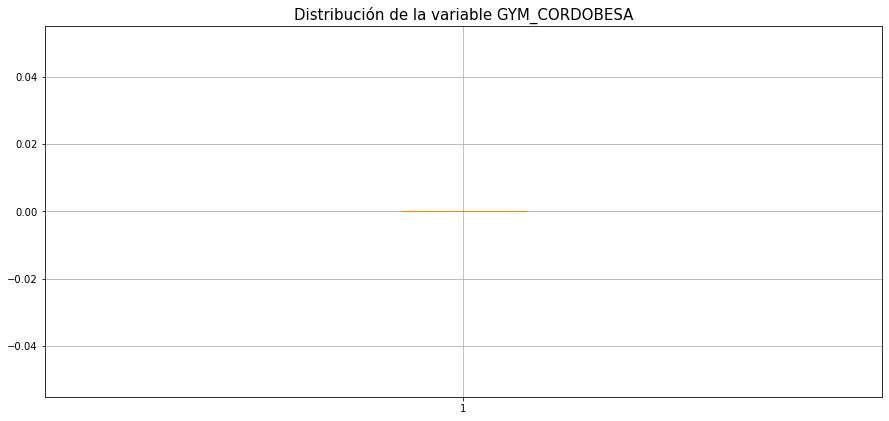

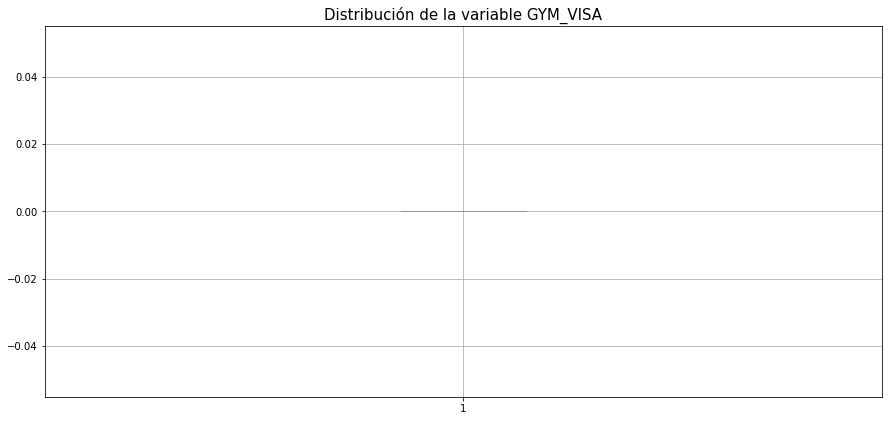

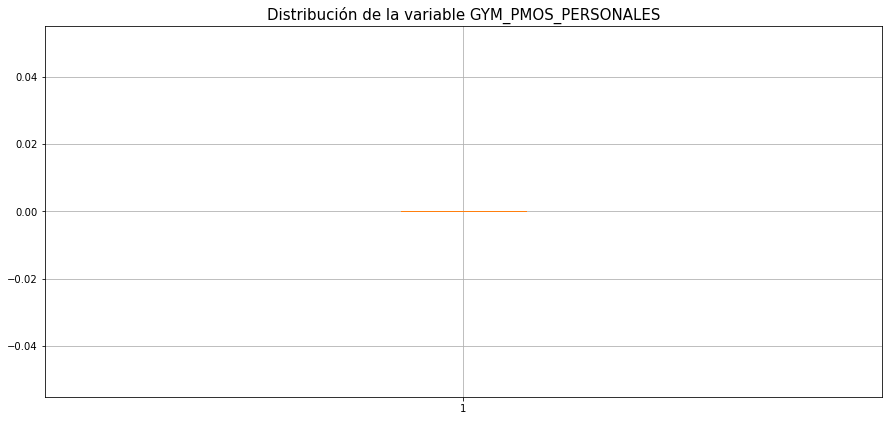

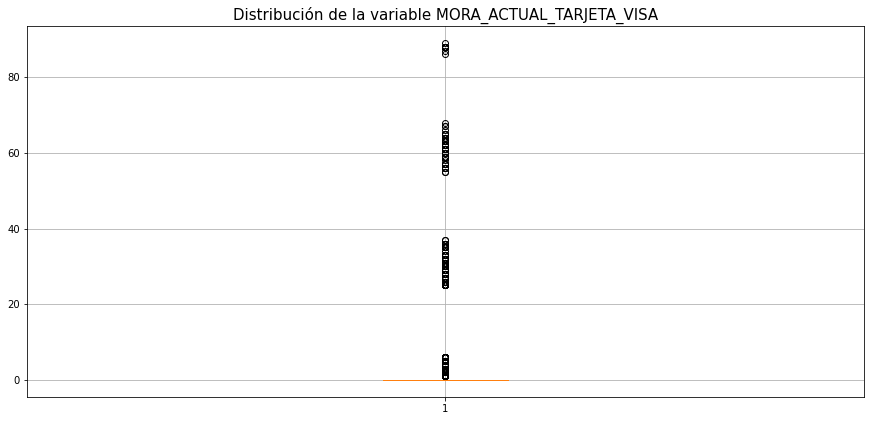

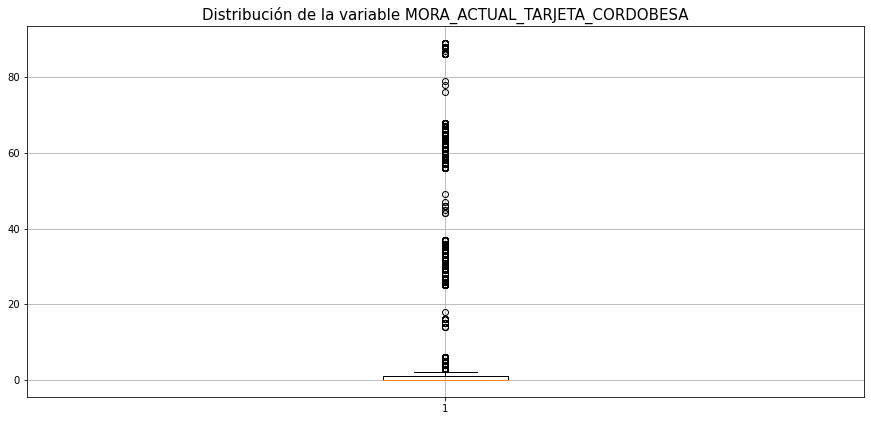

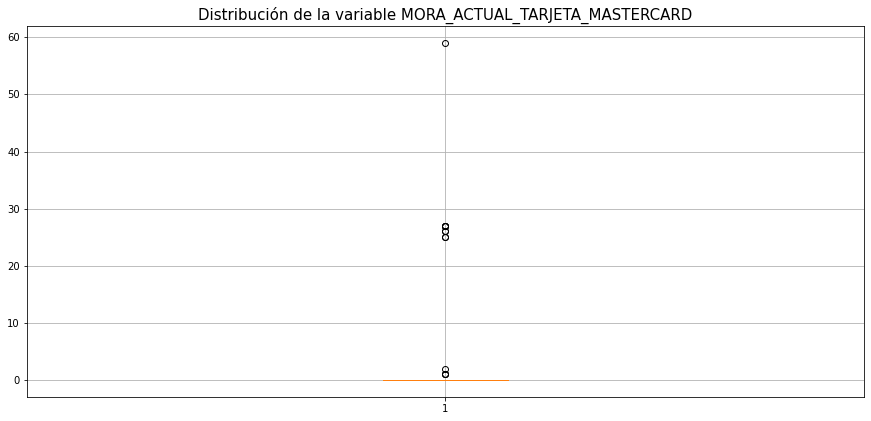

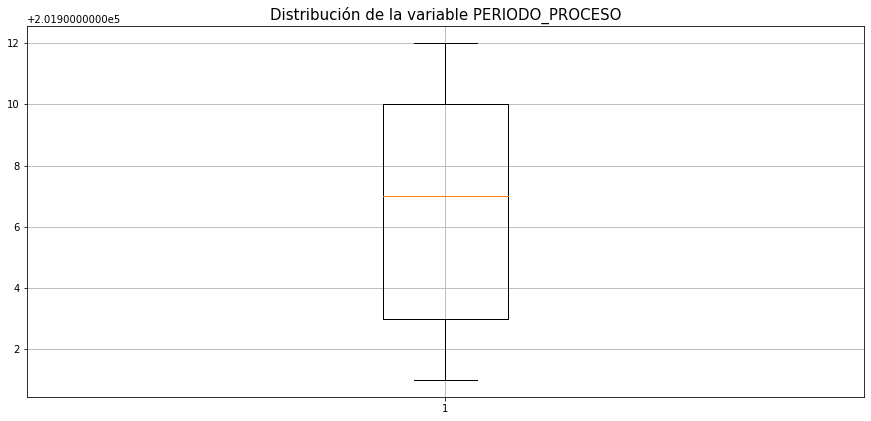

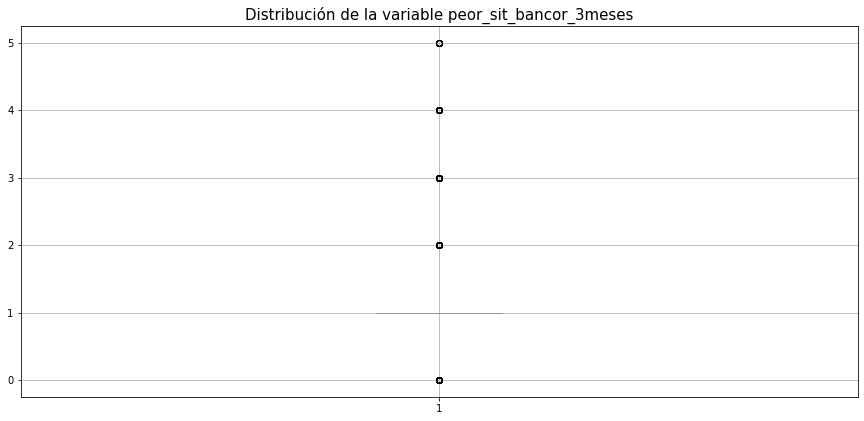

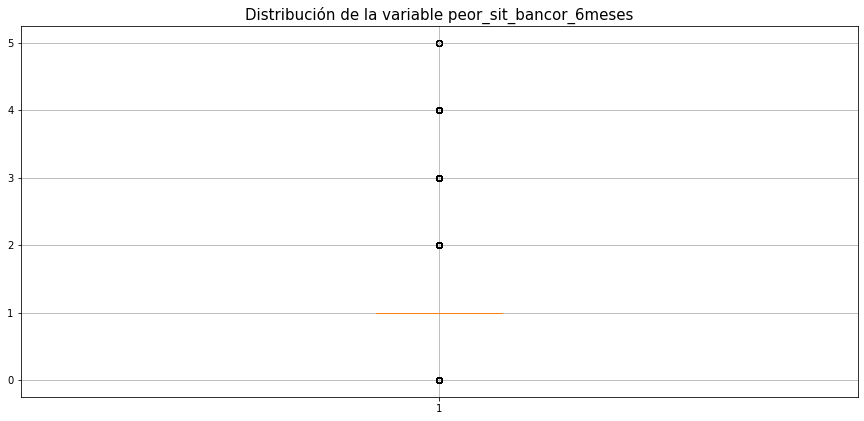

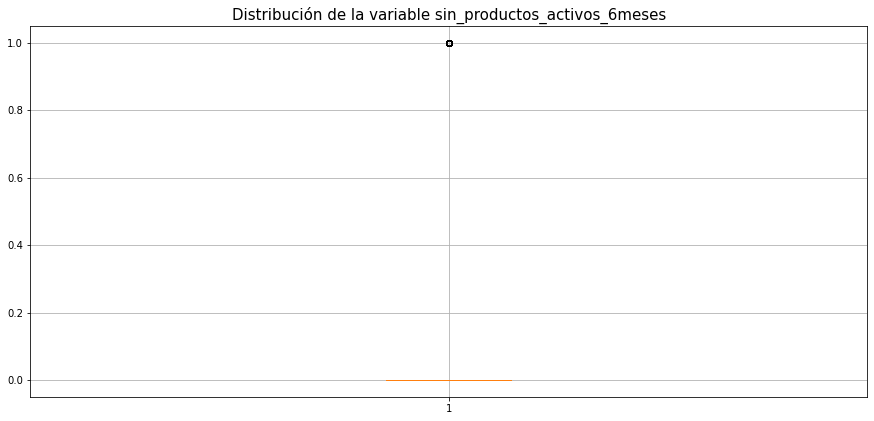

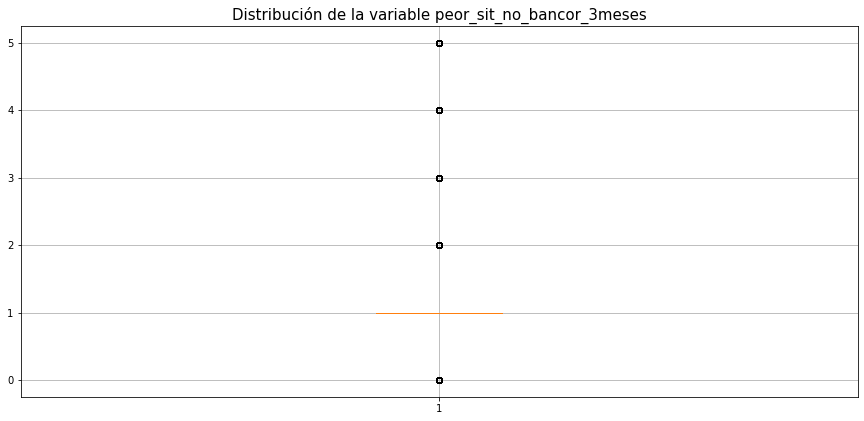

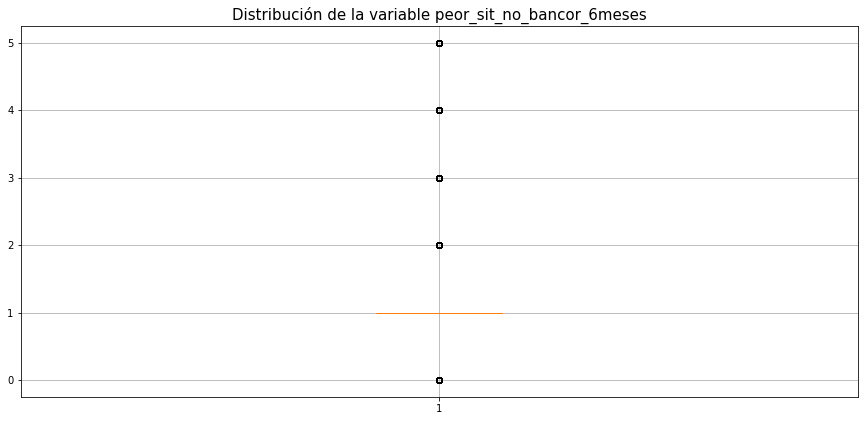

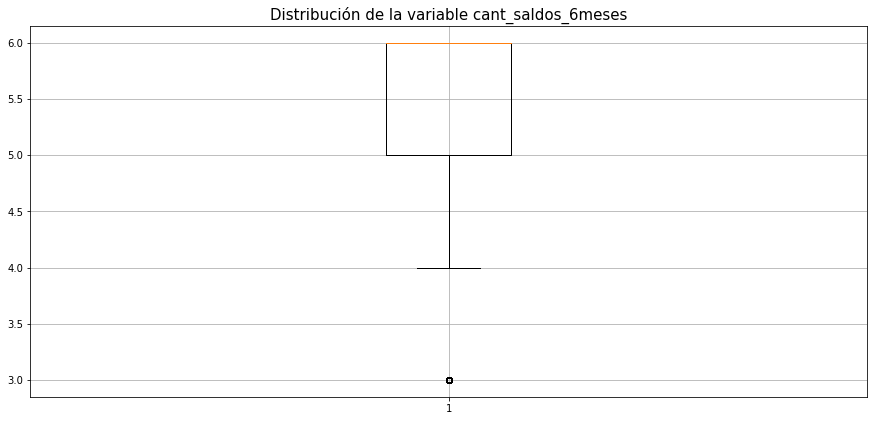

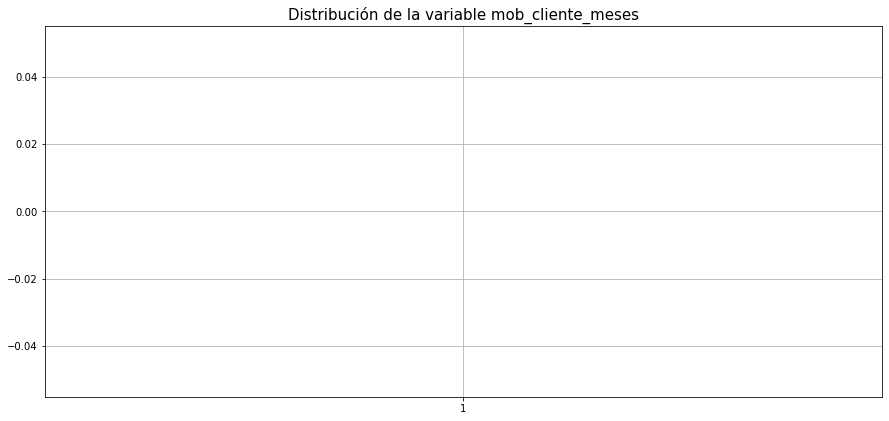

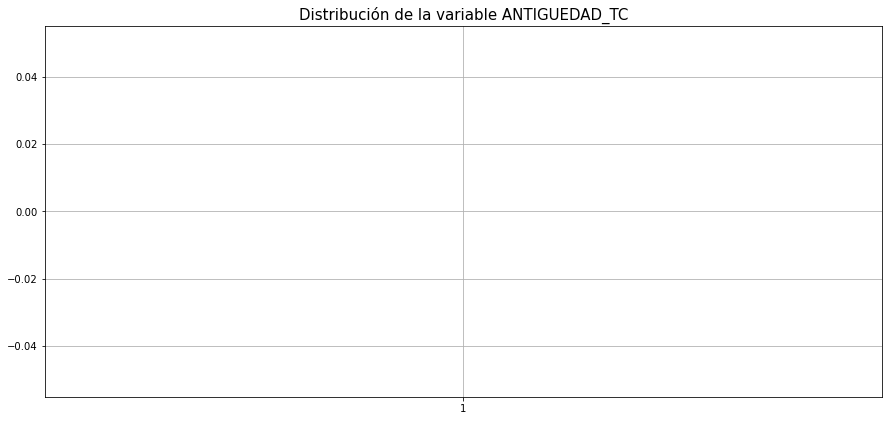

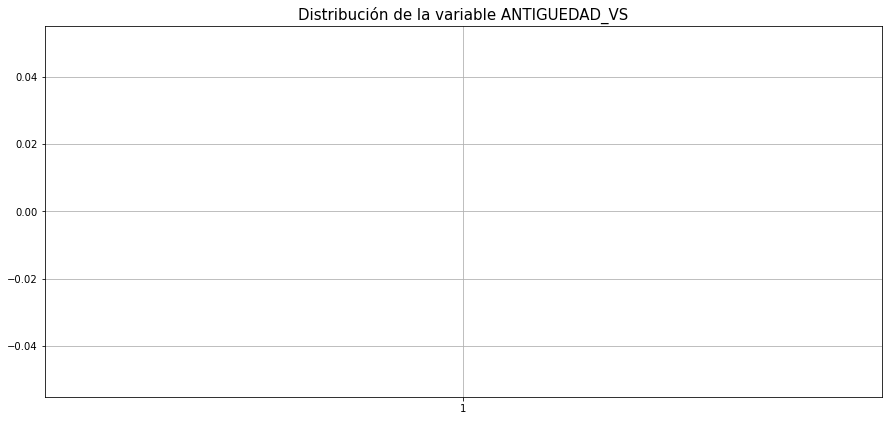

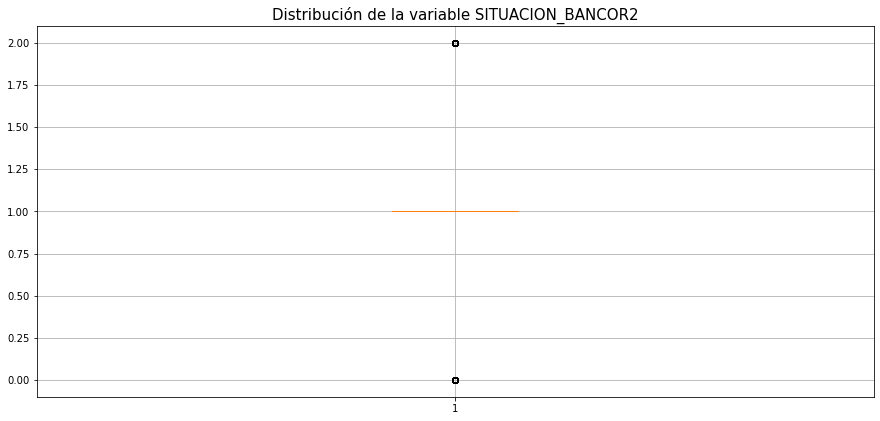

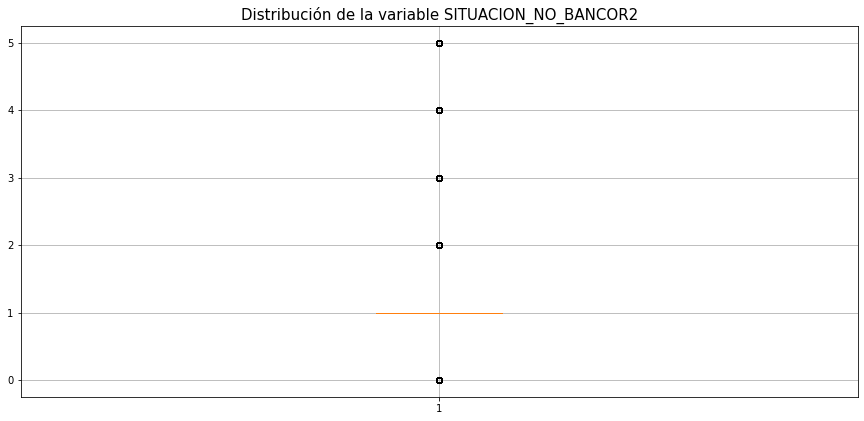

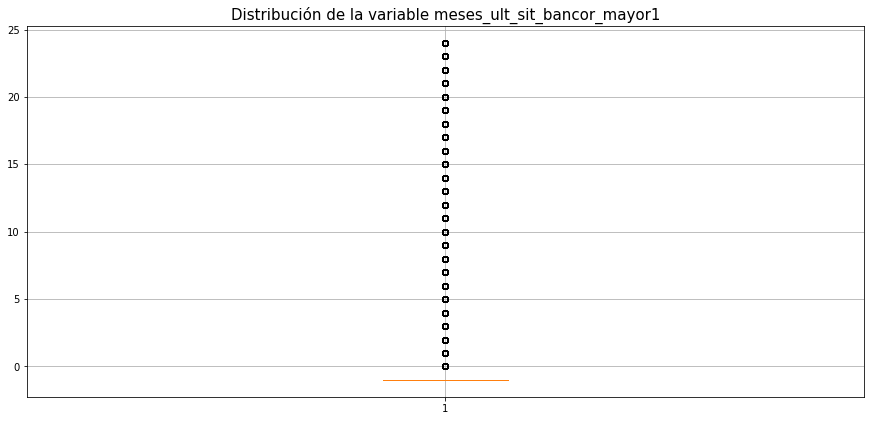

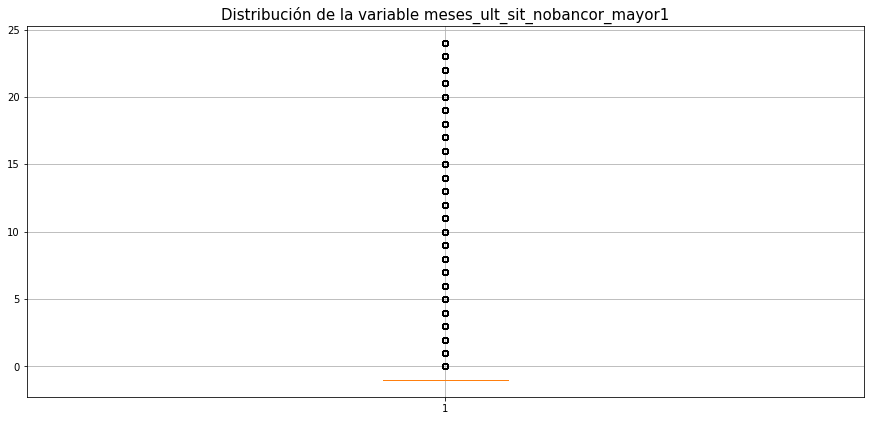

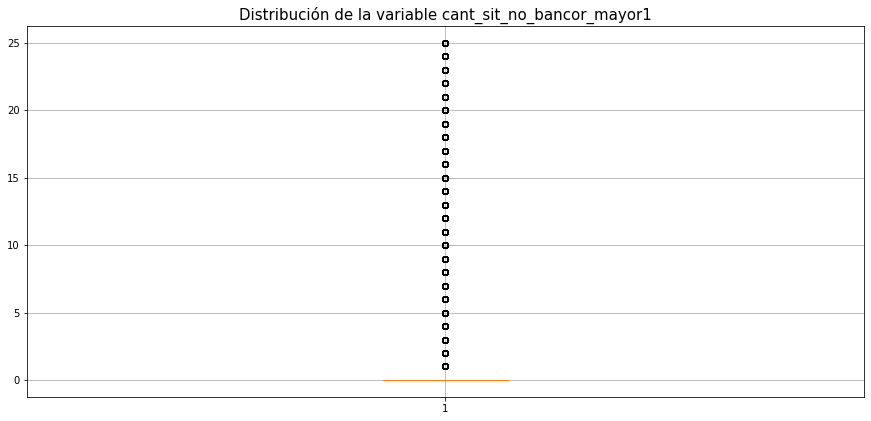

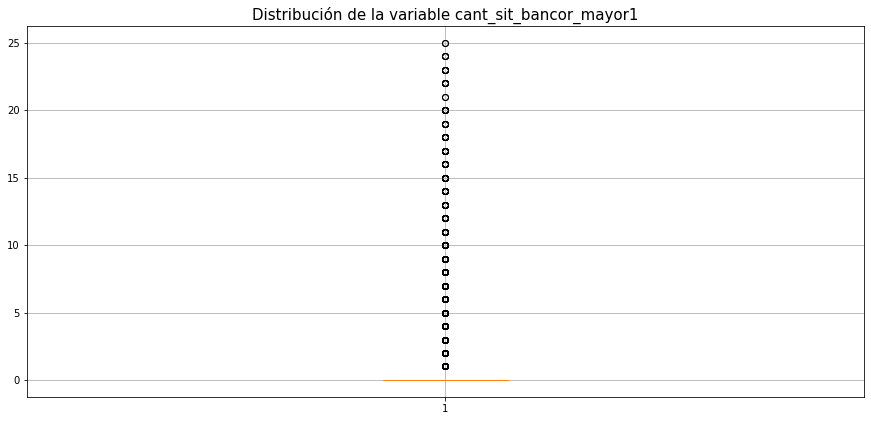

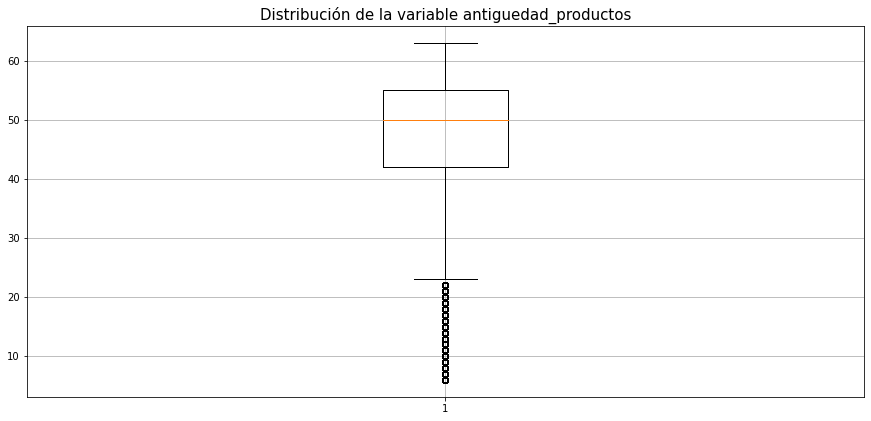

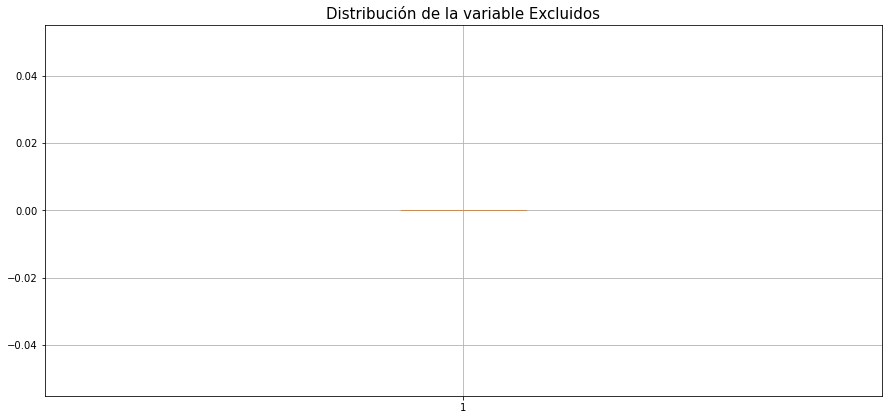

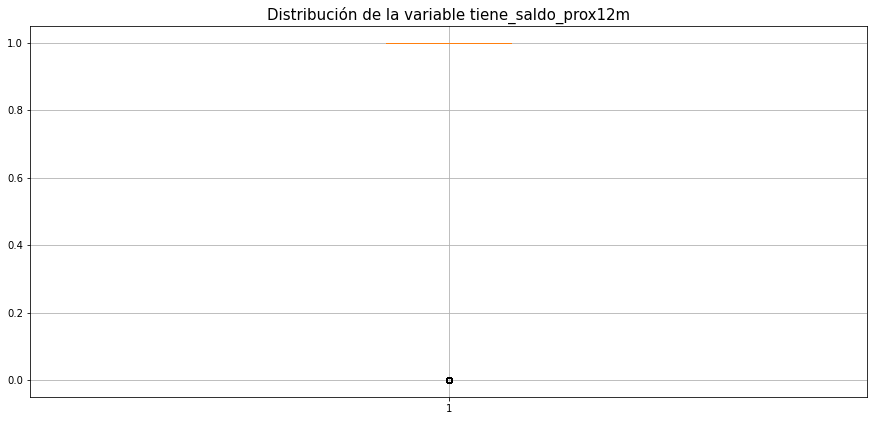

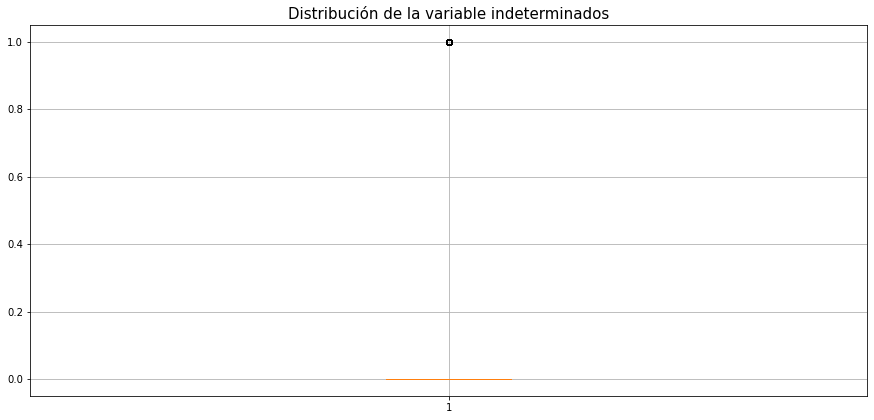

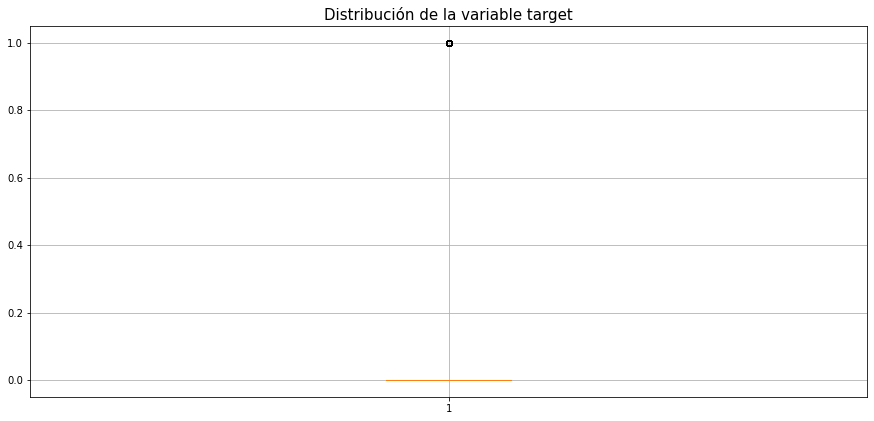

In [21]:
for var in numbase : 
    plt.figure(figsize=(15,15))
    plt.subplot(2, 1, 1)
    plt.boxplot(data=base, x= var)
    plt.title(f'Distribución de la variable {var}' ,size='15')
    plt.grid(True)  

    plt.show()

In [ ]:
#VARIABLES PARA REALIZAR ANALISIS DESCRIPTIVO POR HISTOGRAMA 

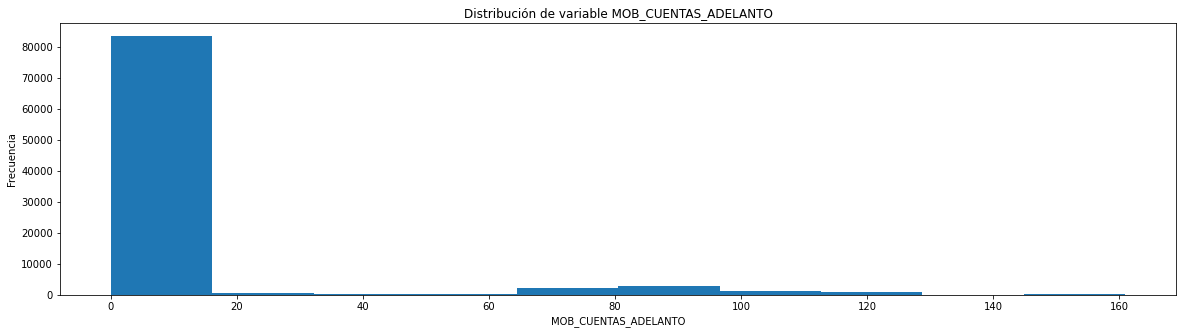

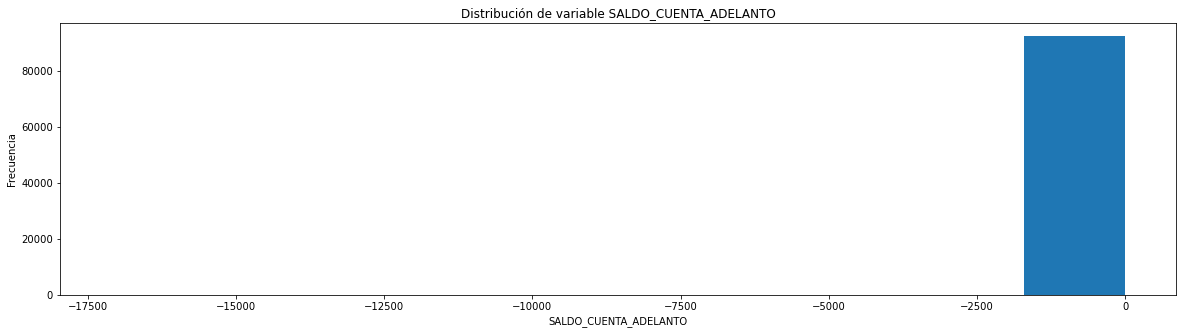

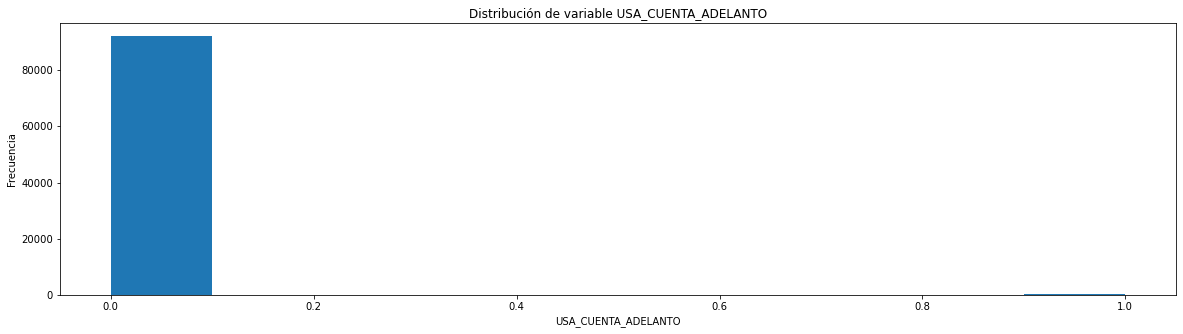

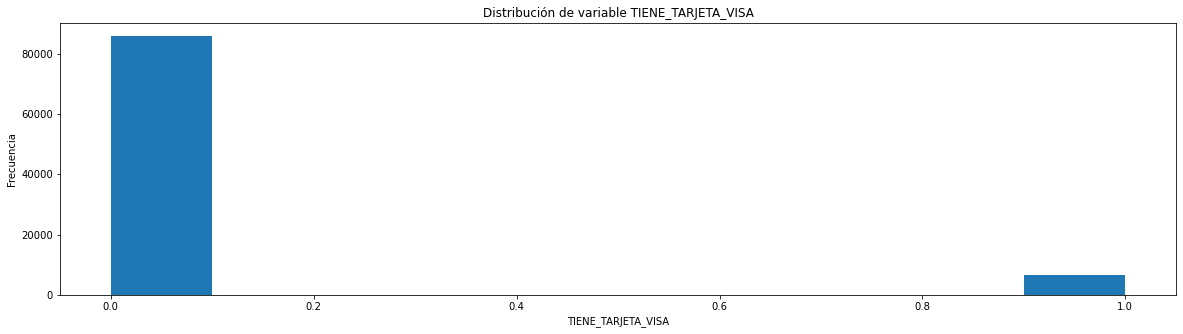

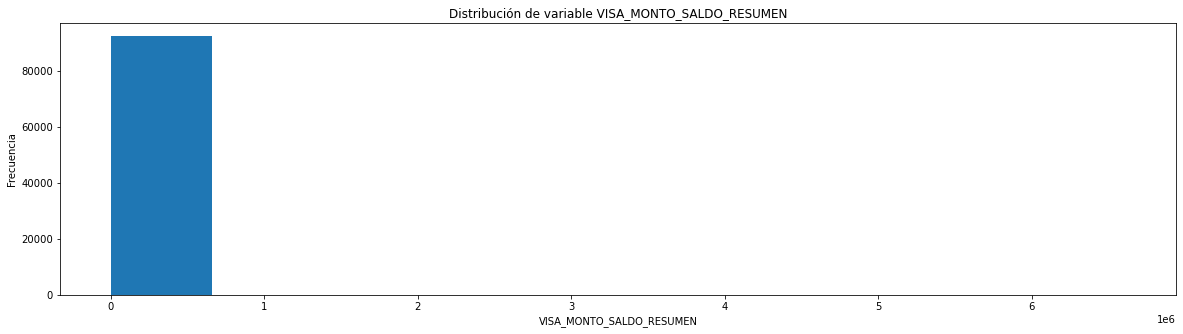

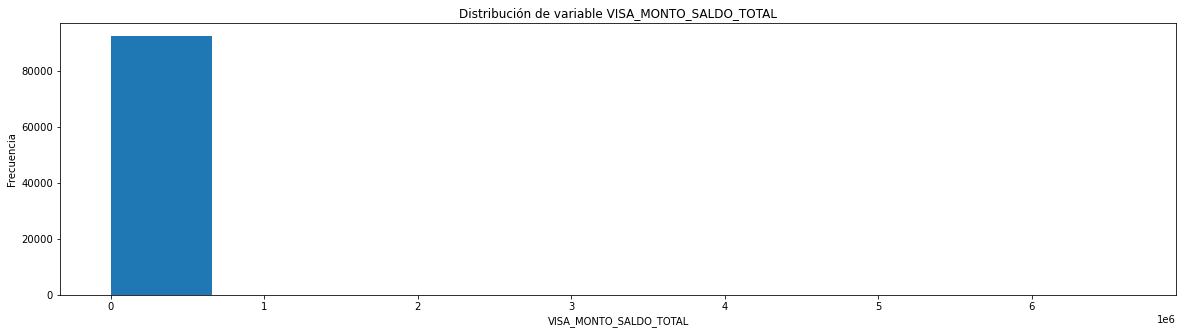

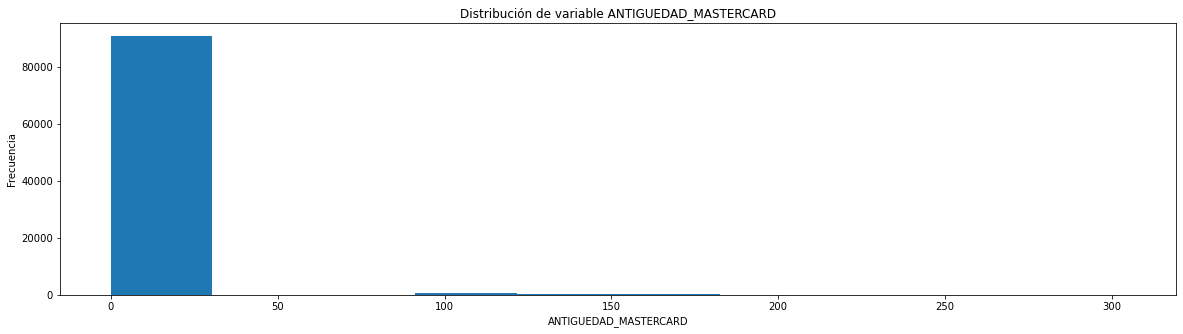

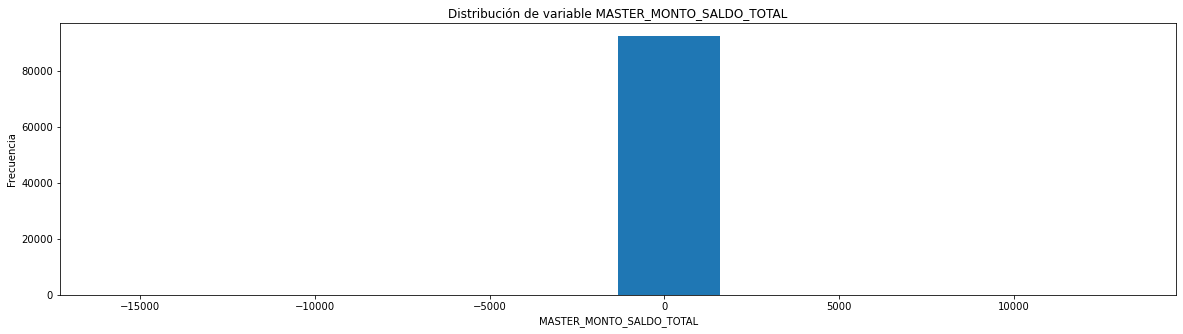

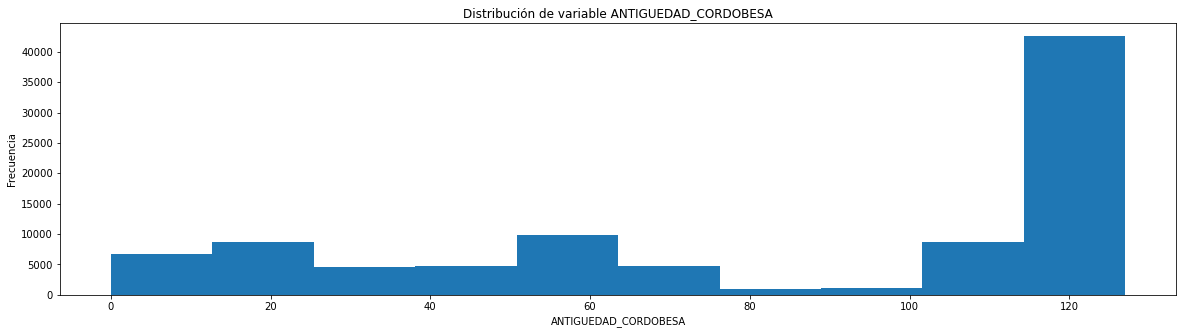

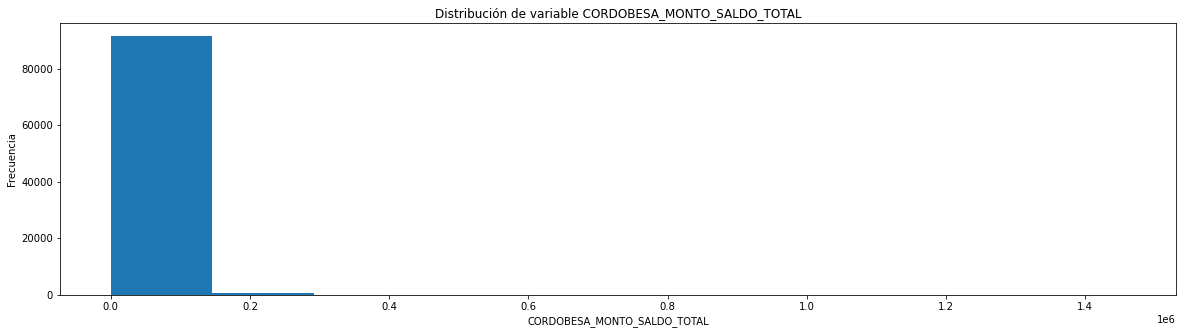

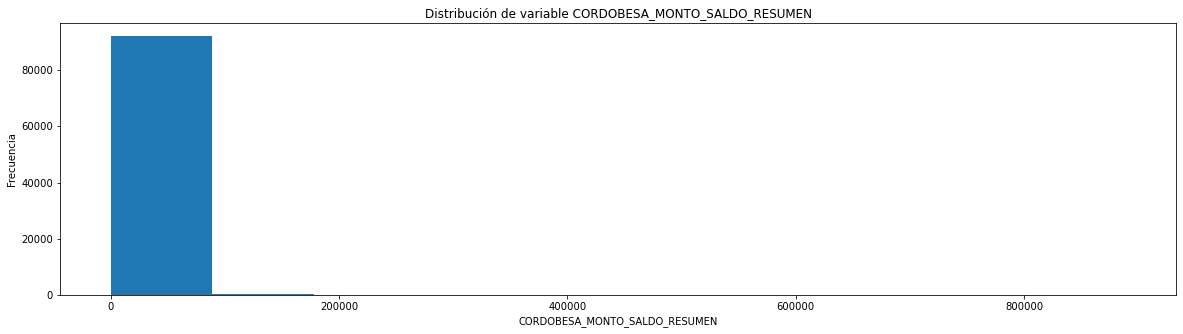

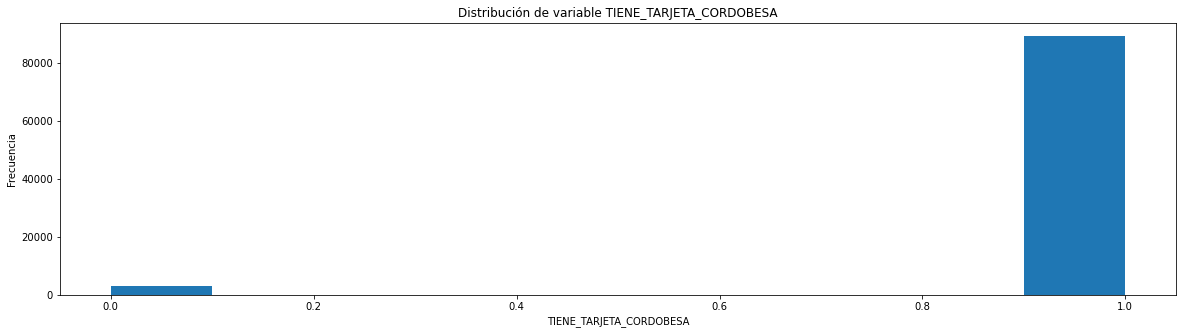

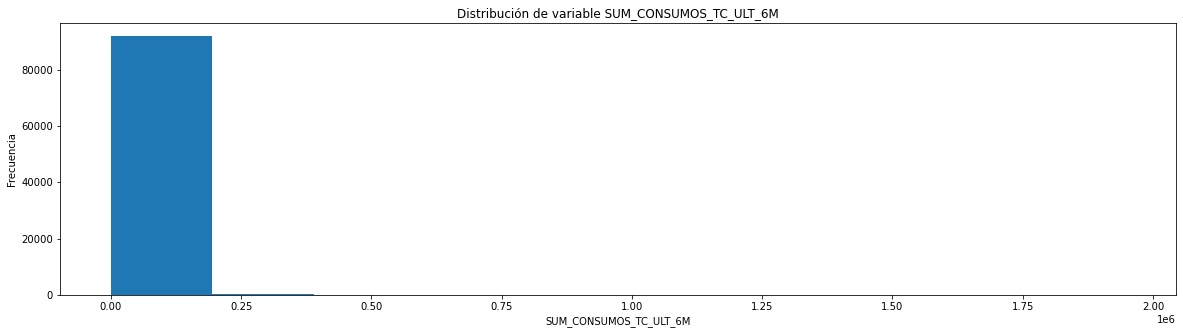

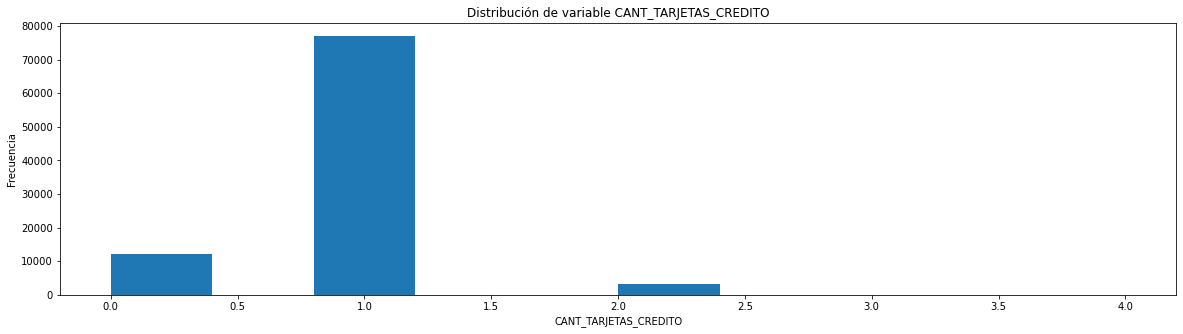

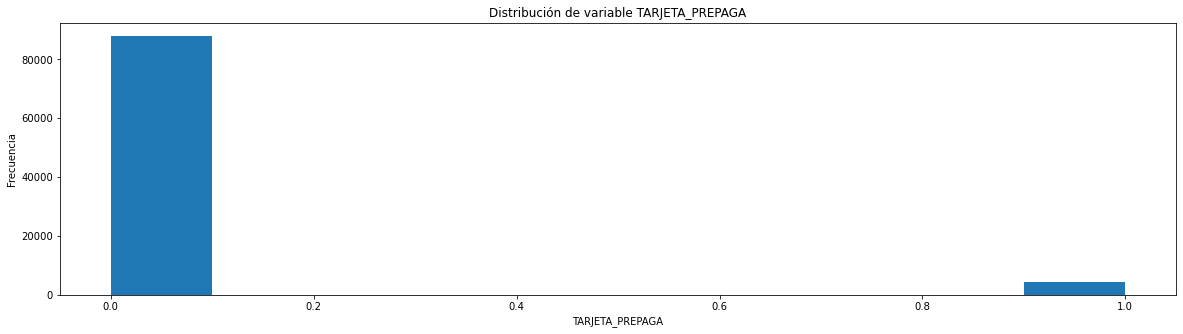

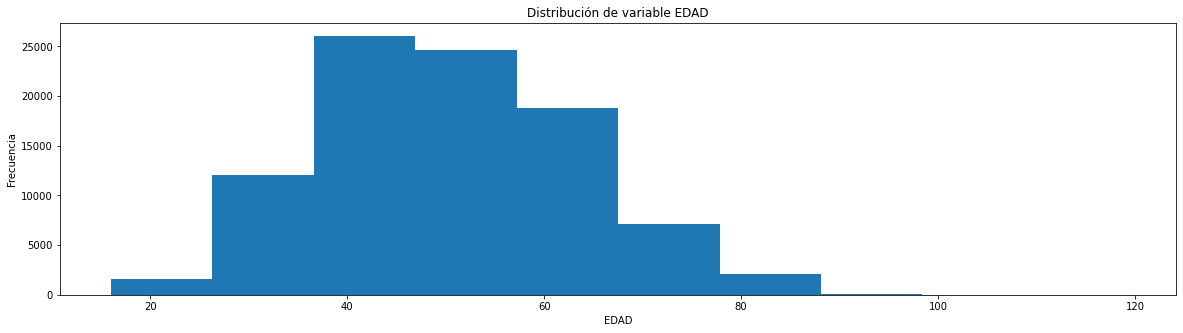

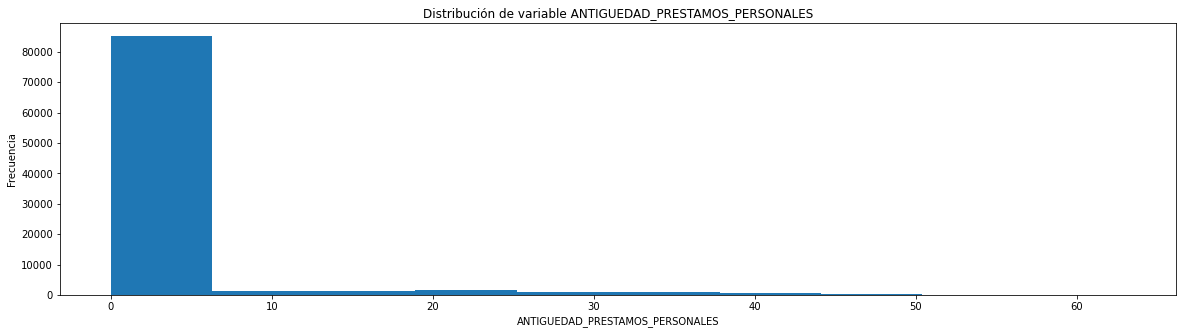

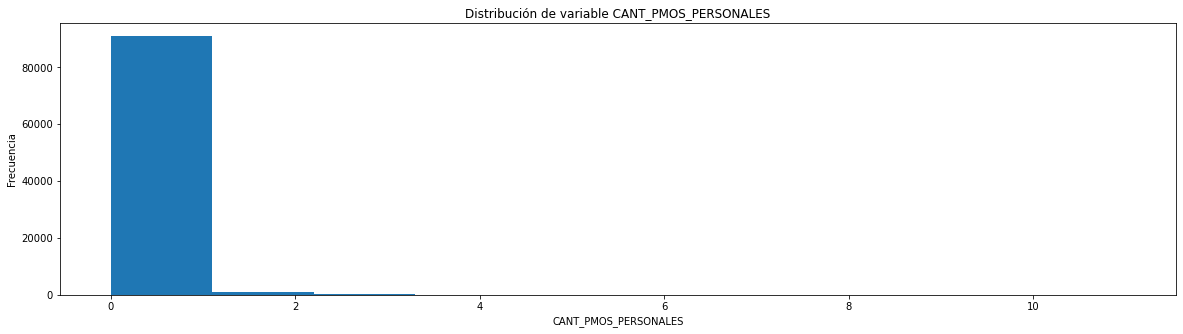

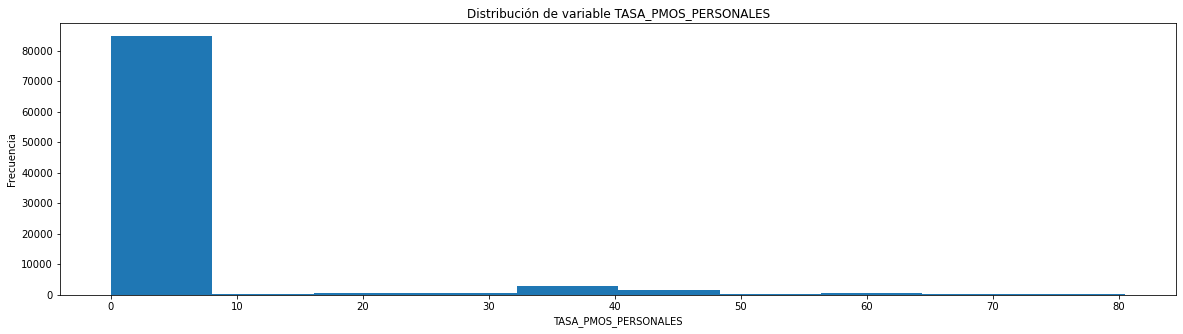

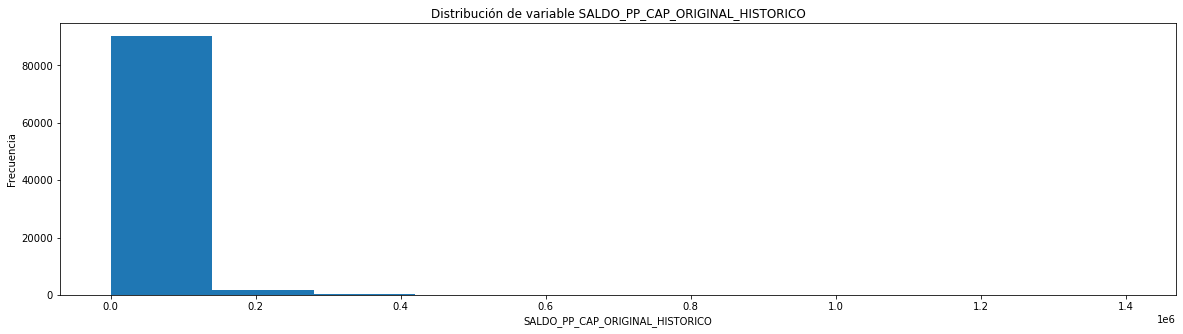

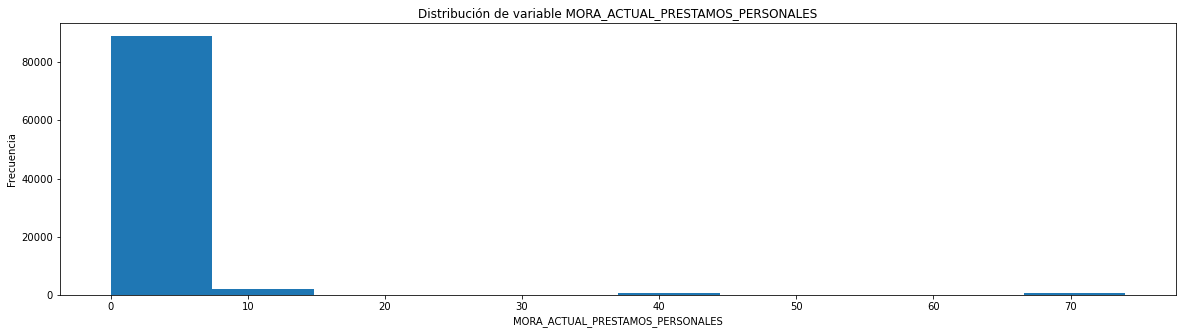

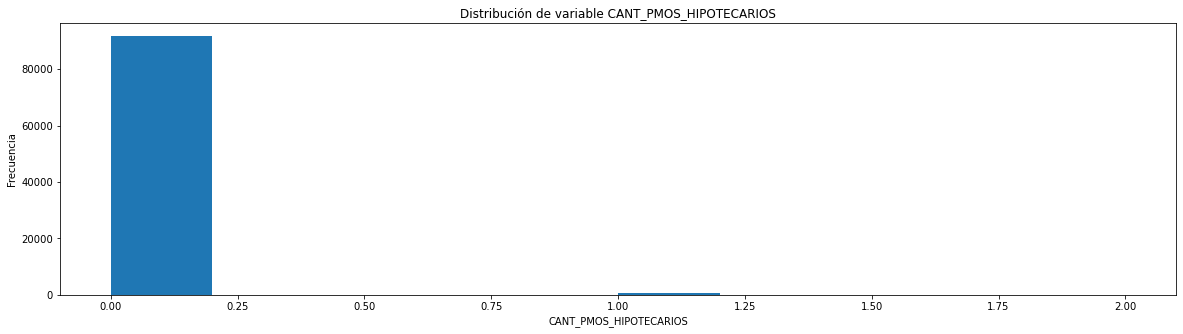

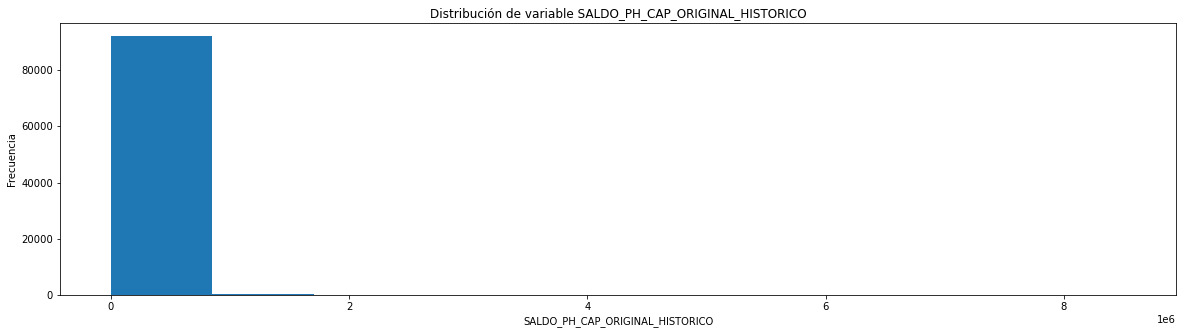

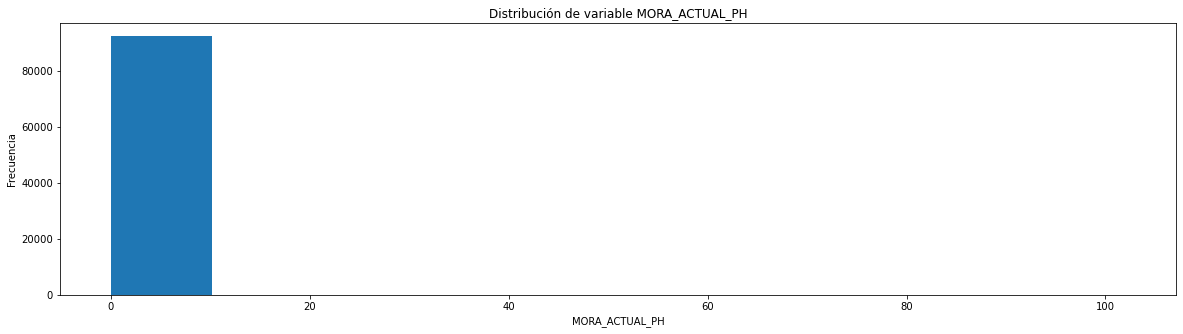

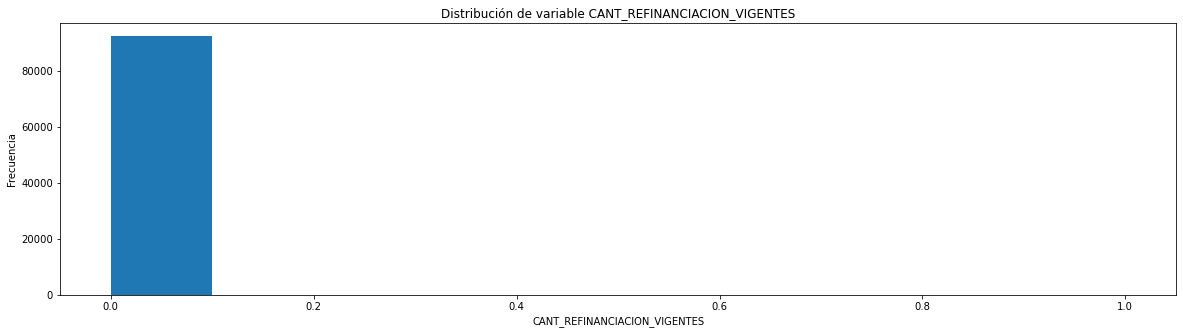

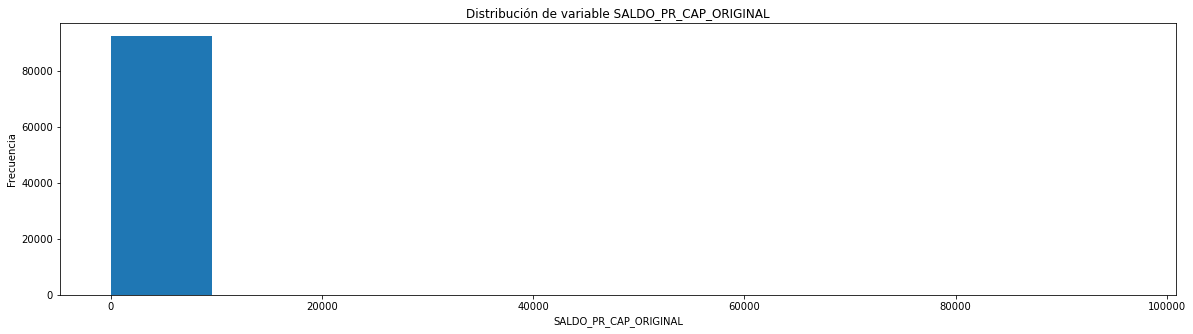

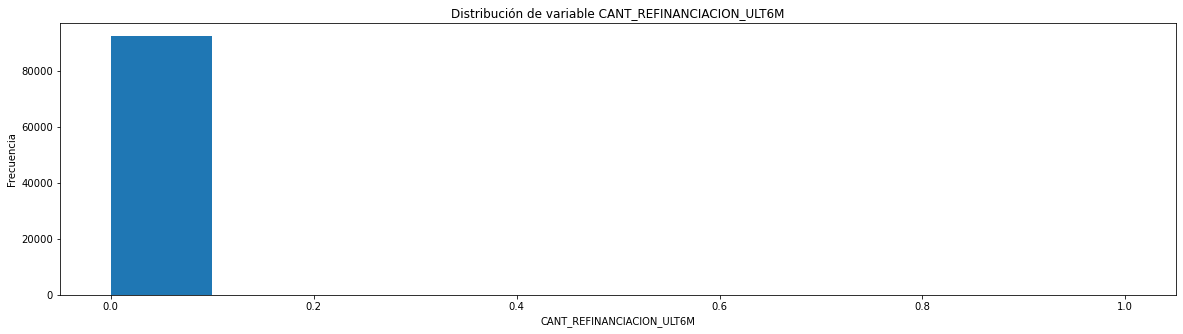

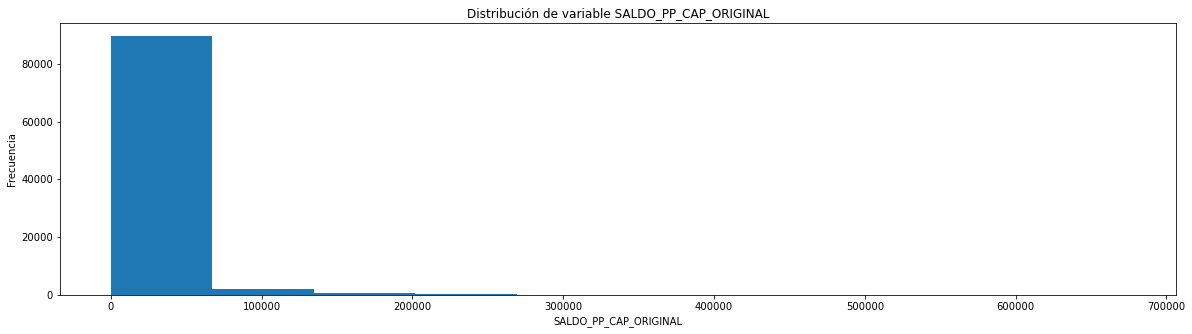

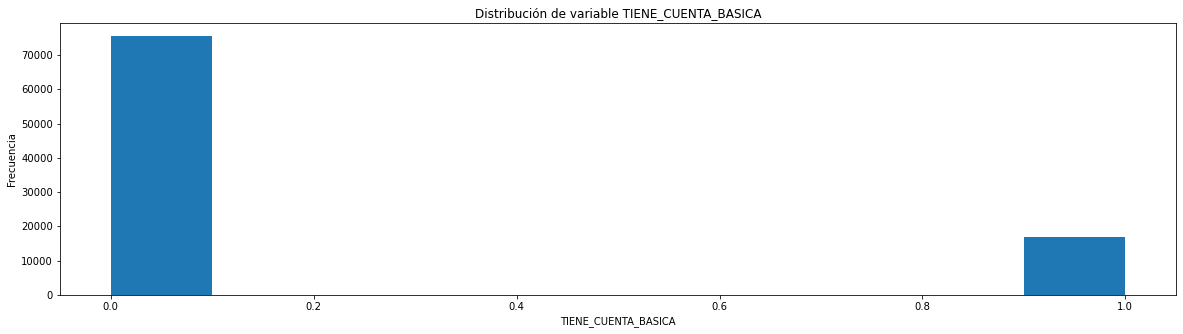

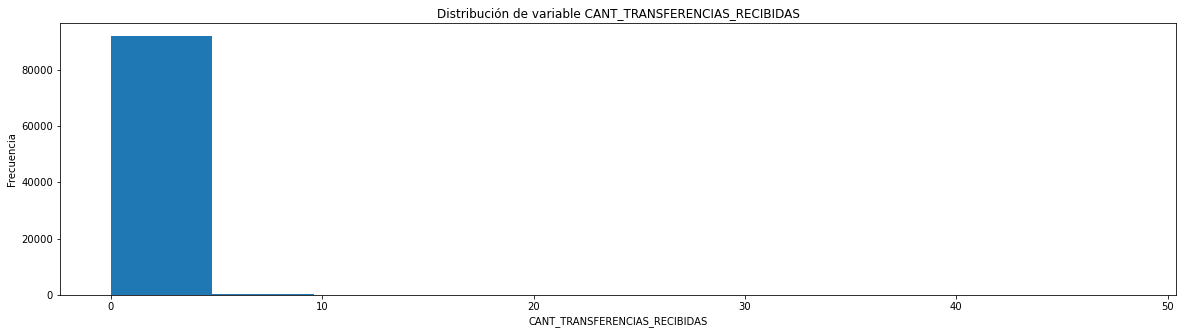

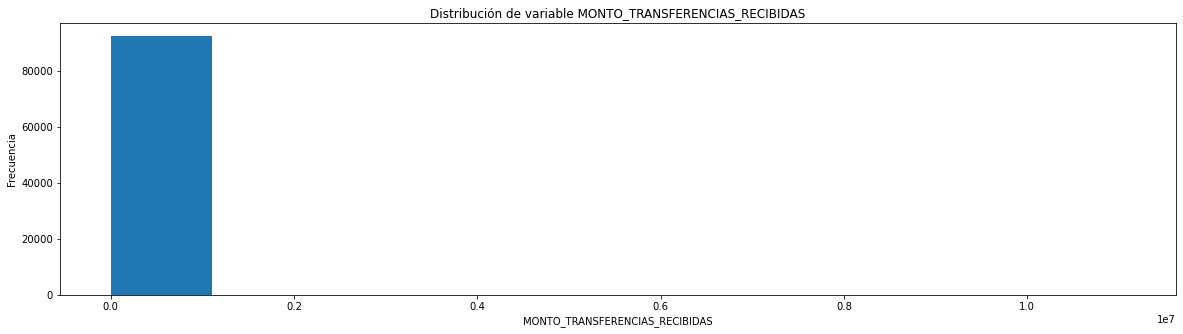

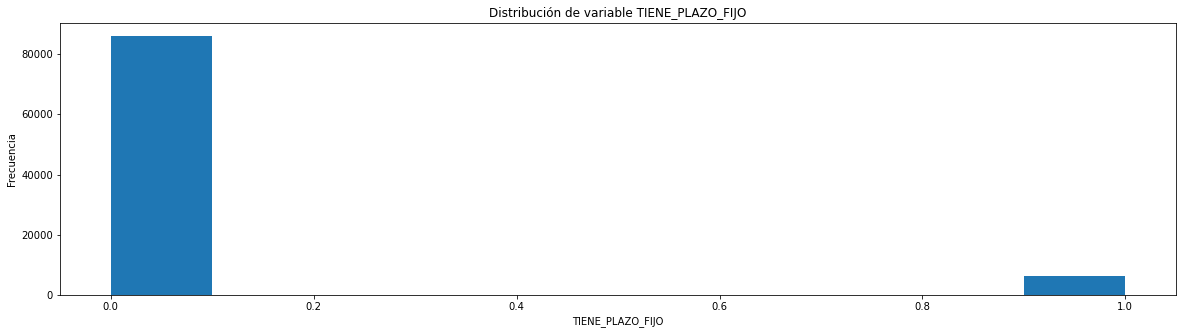

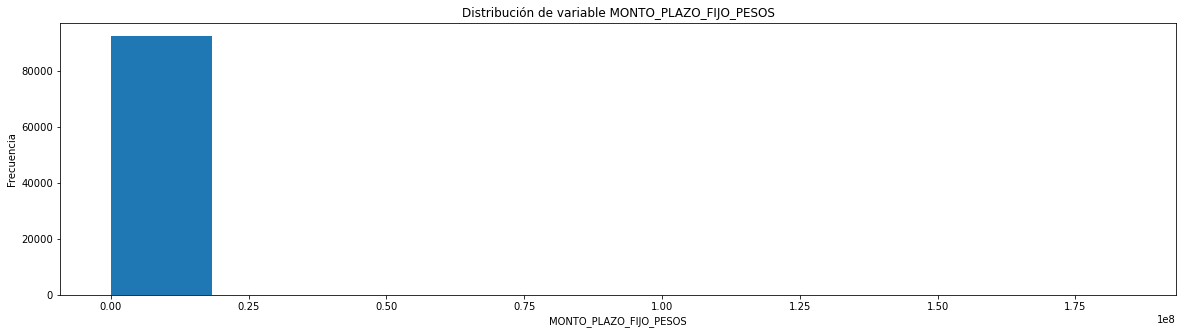

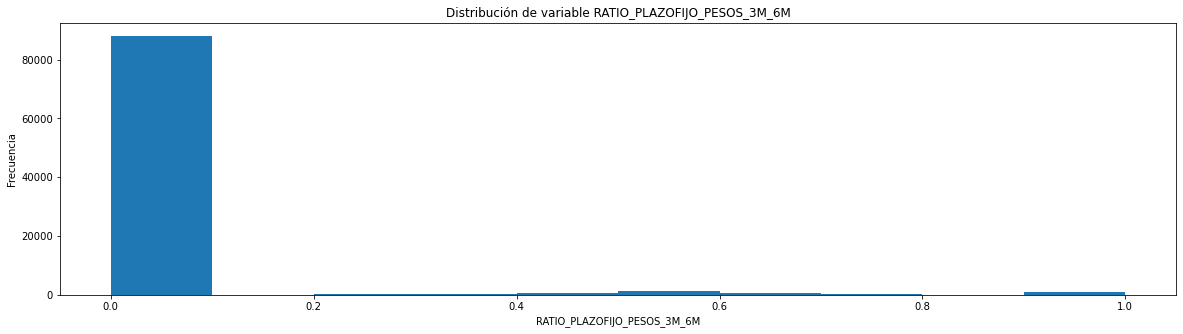

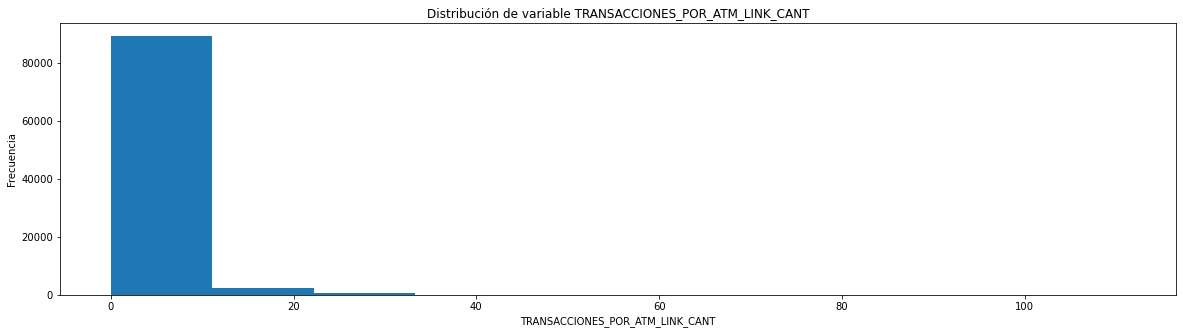

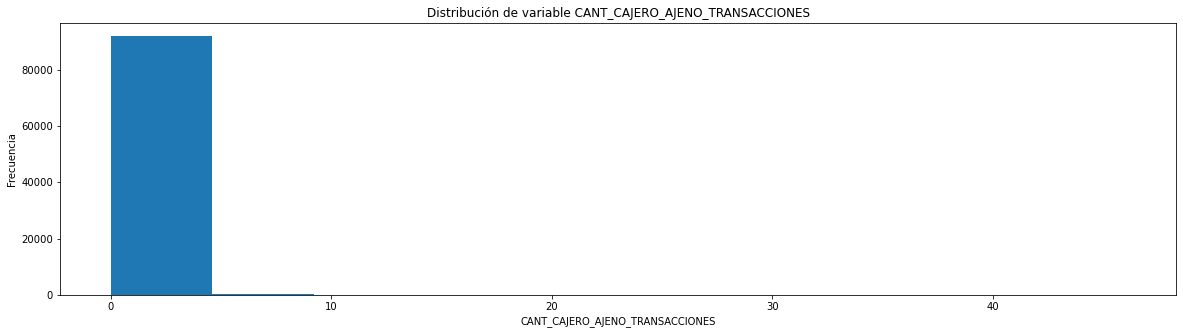

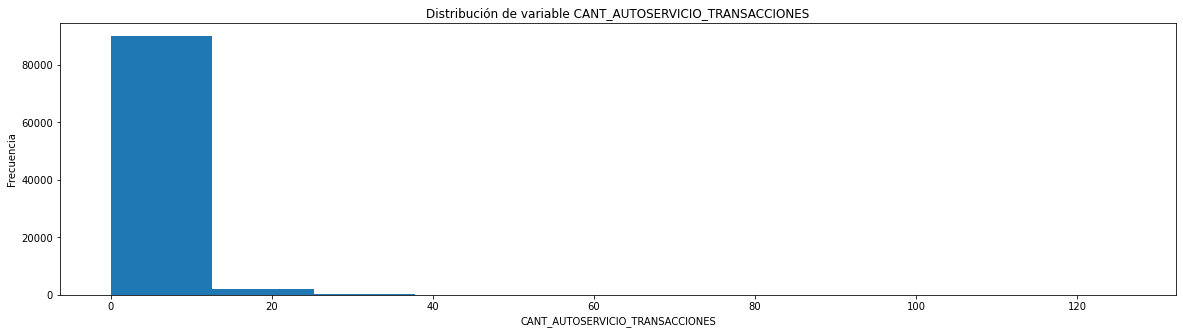

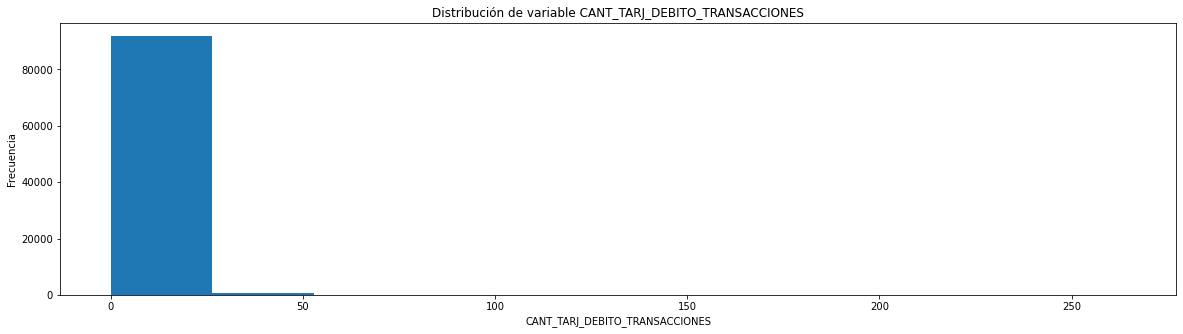

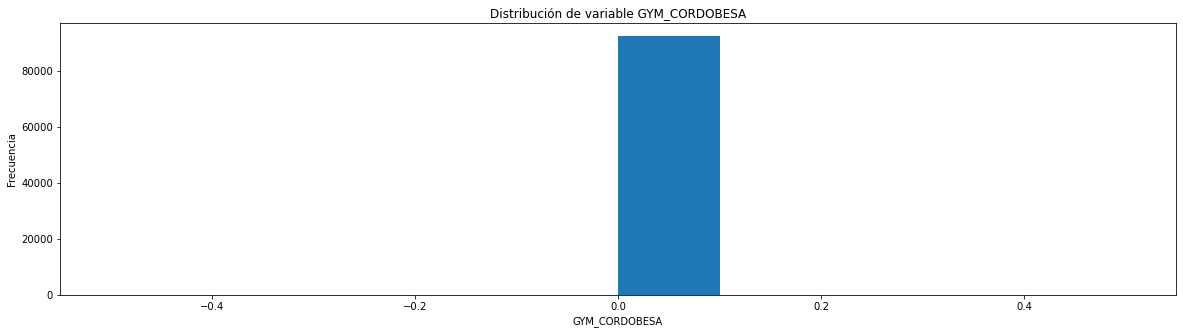

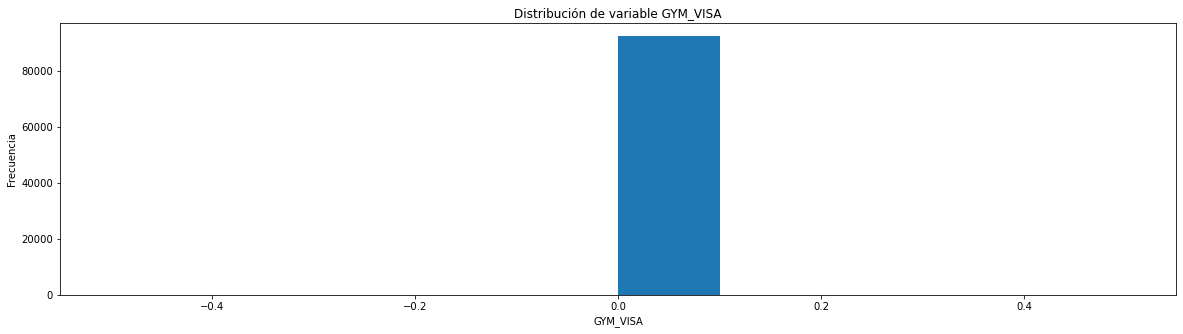

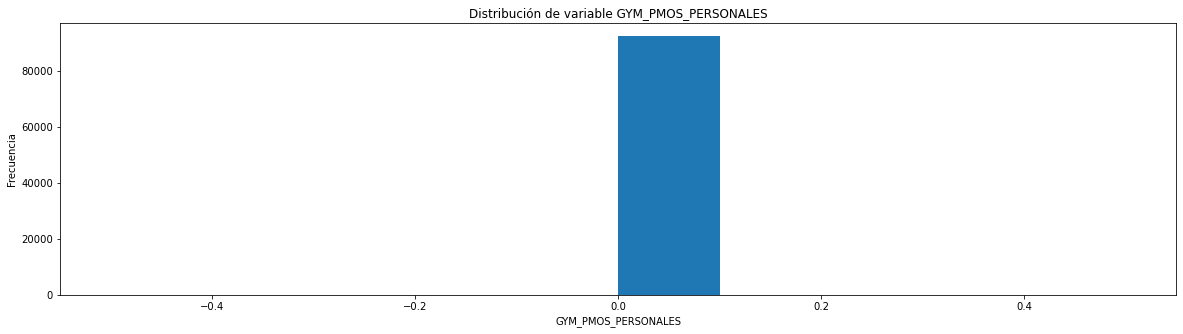

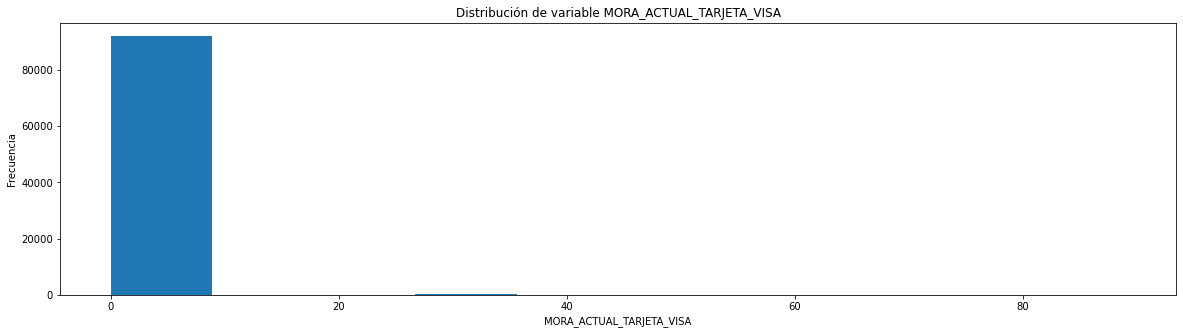

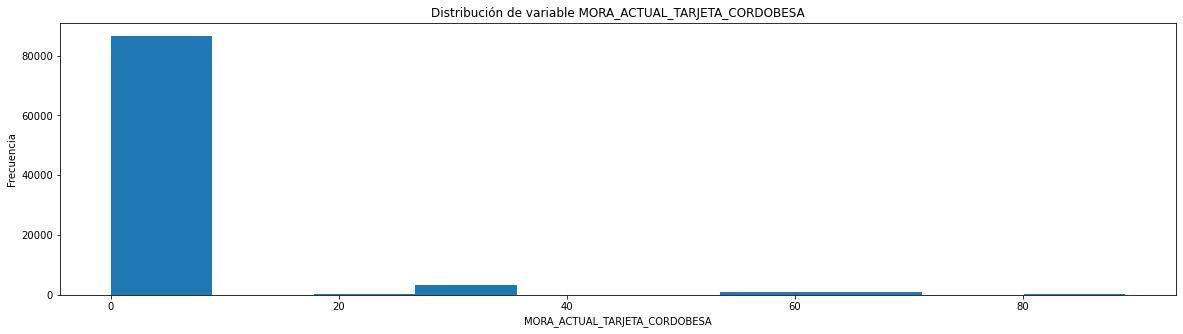

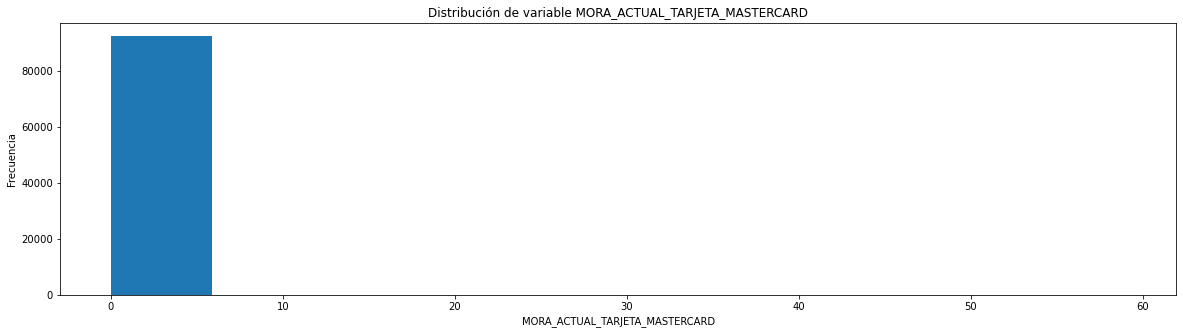

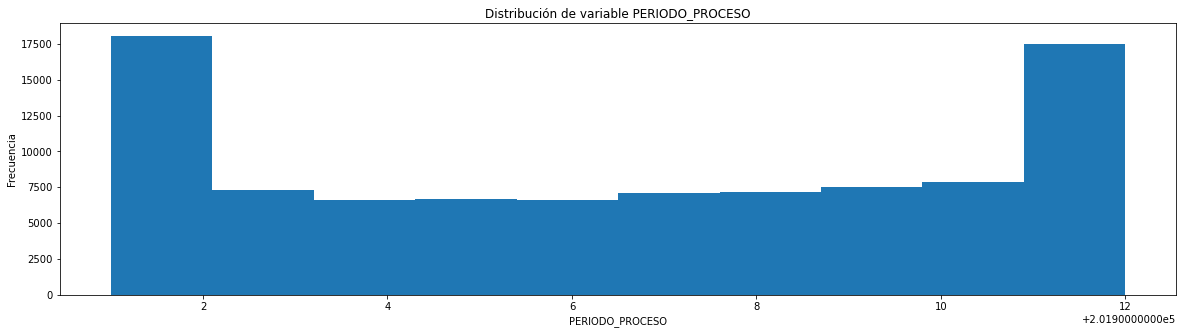

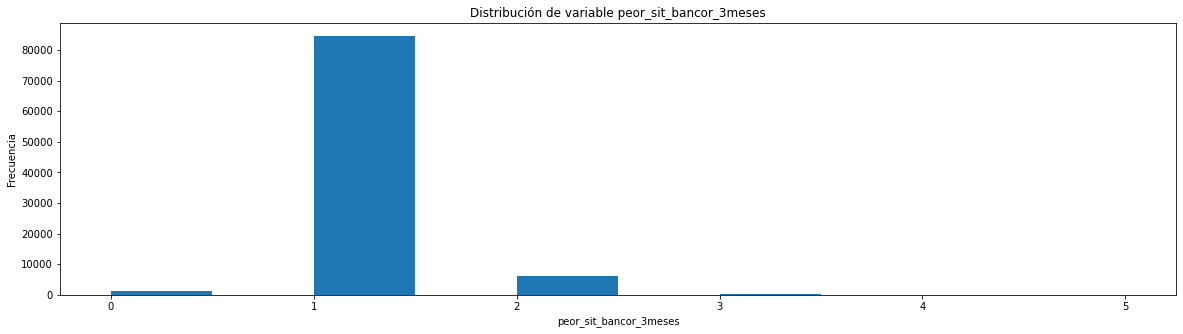

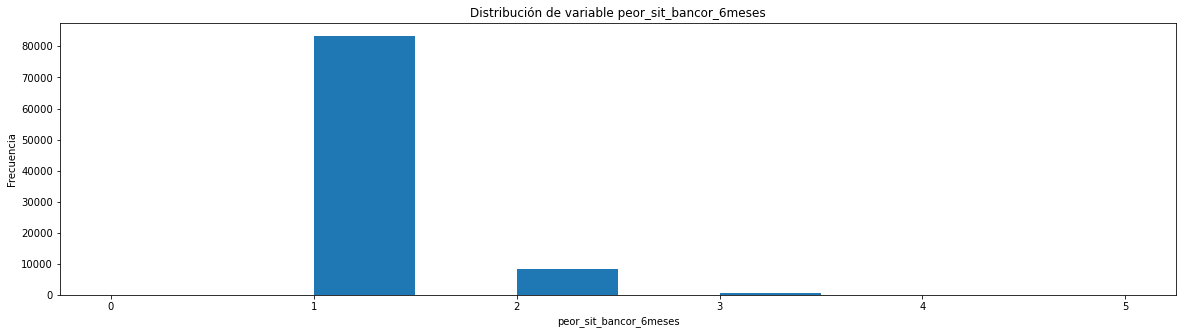

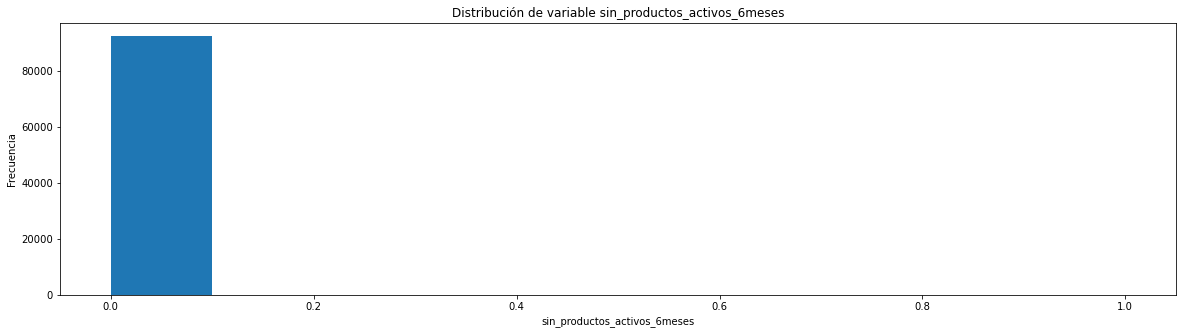

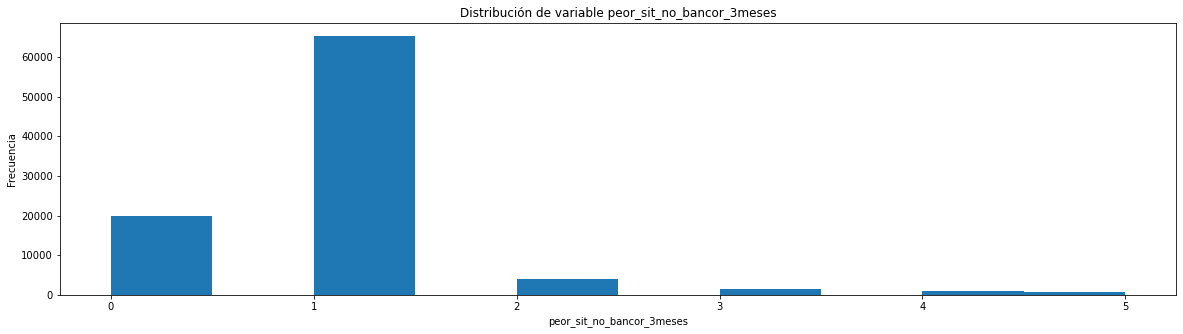

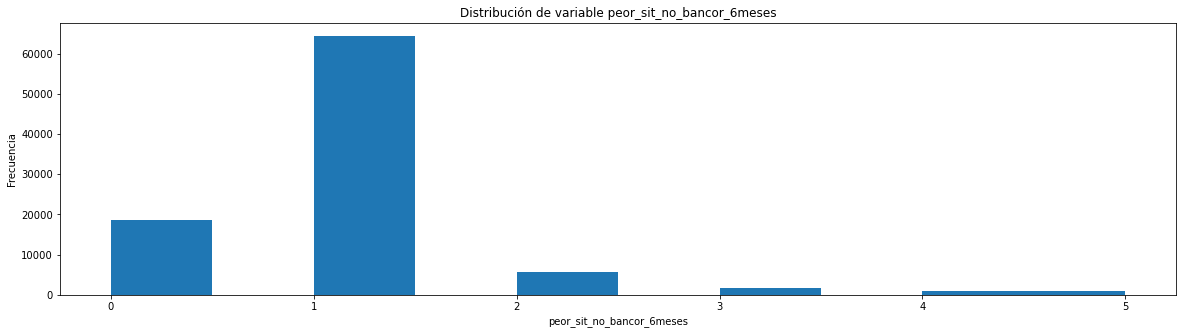

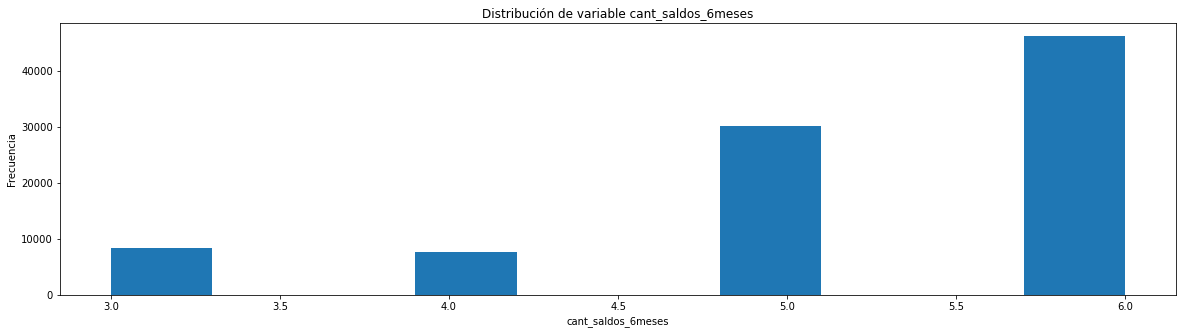

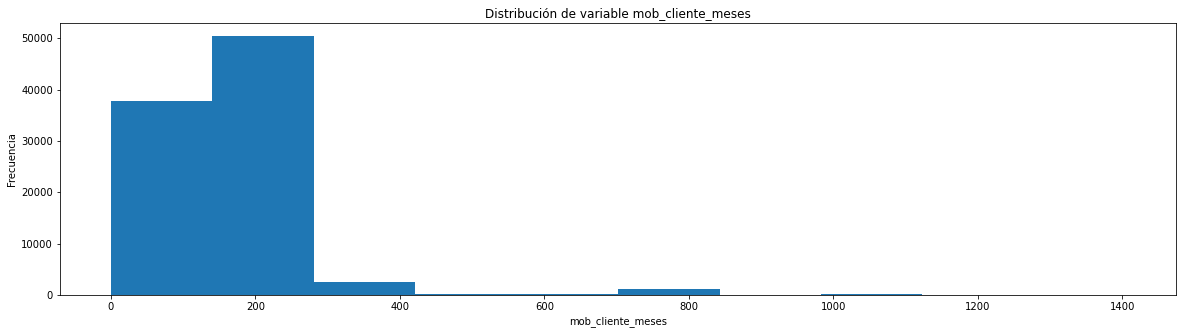

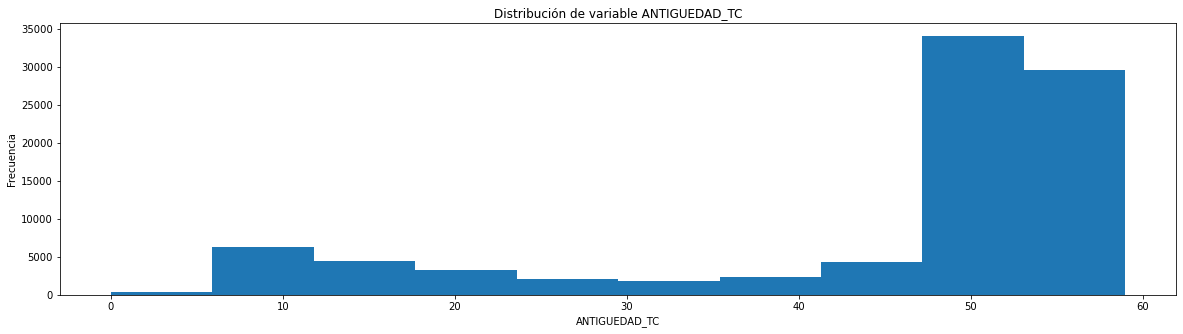

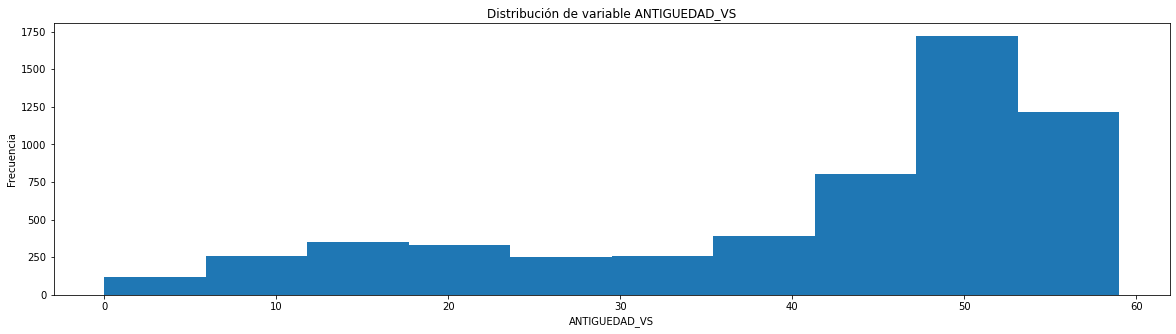

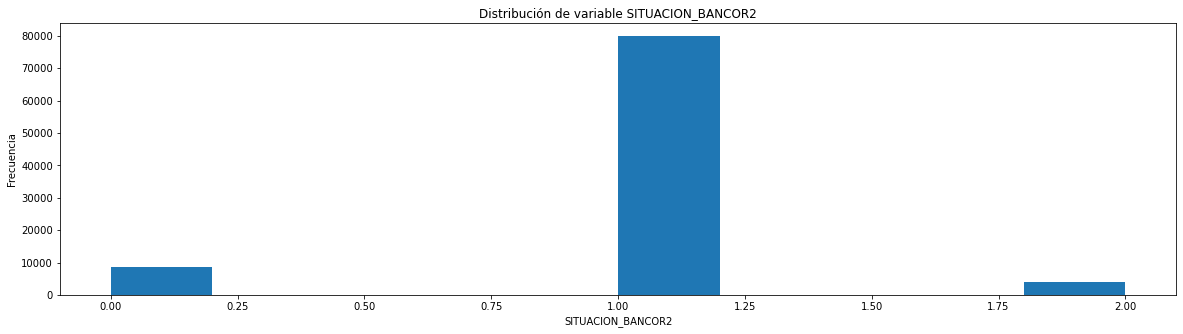

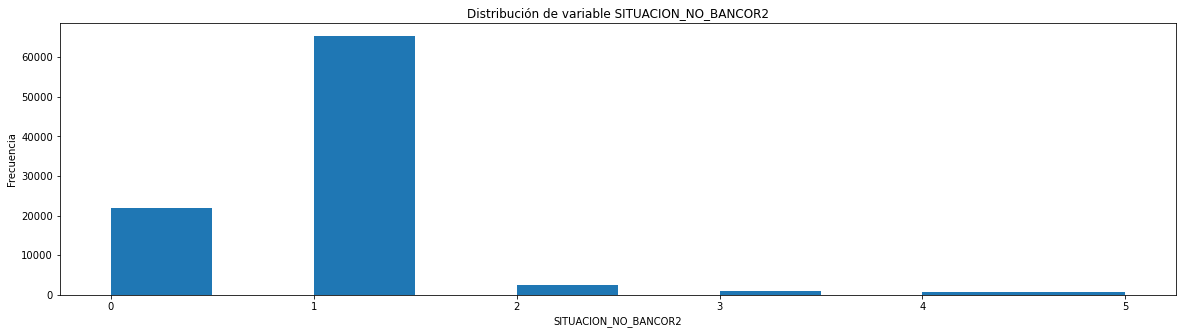

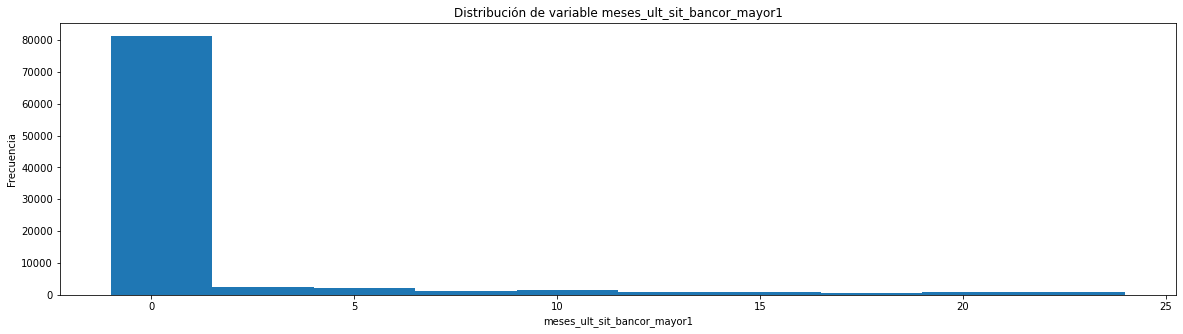

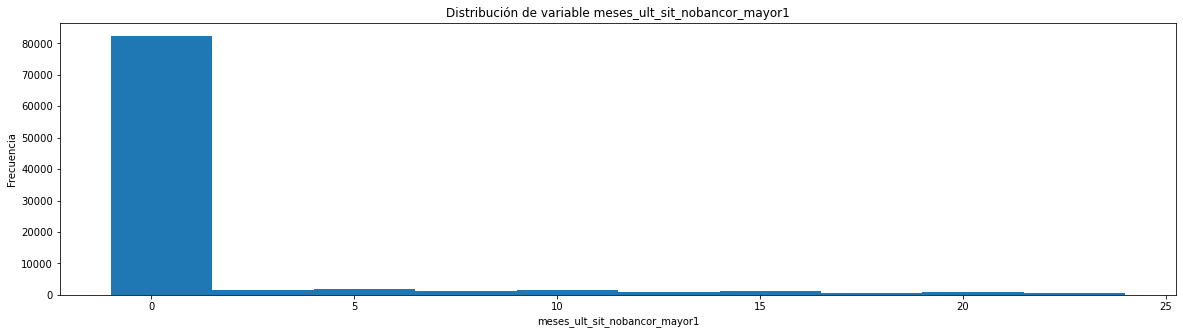

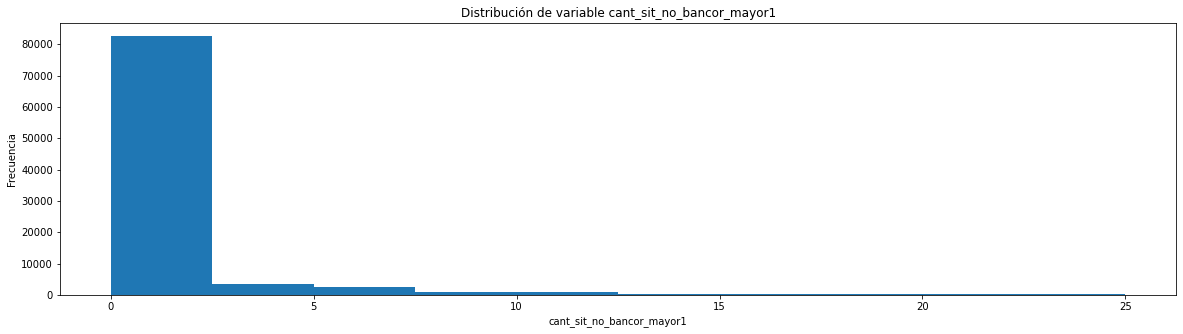

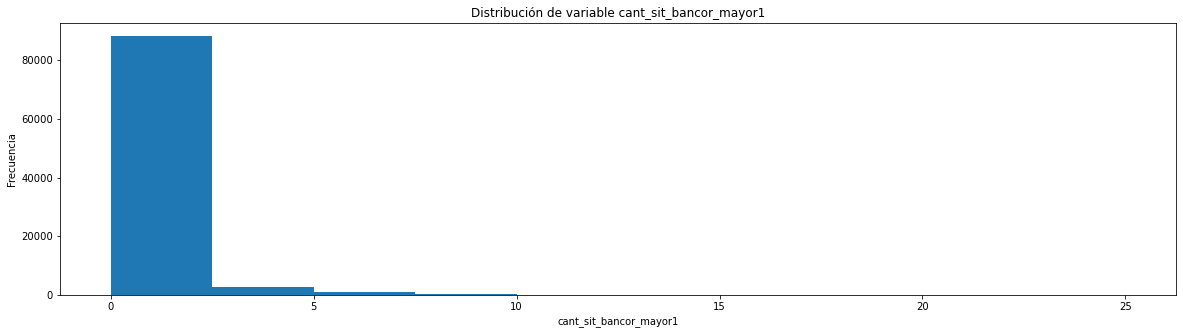

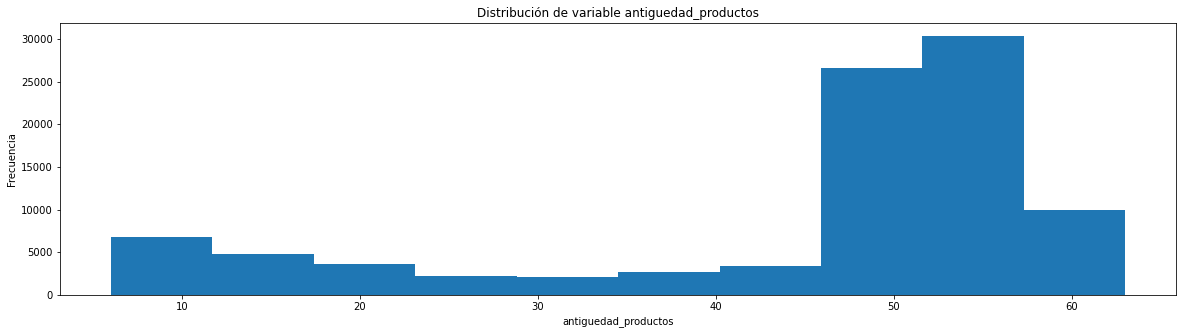

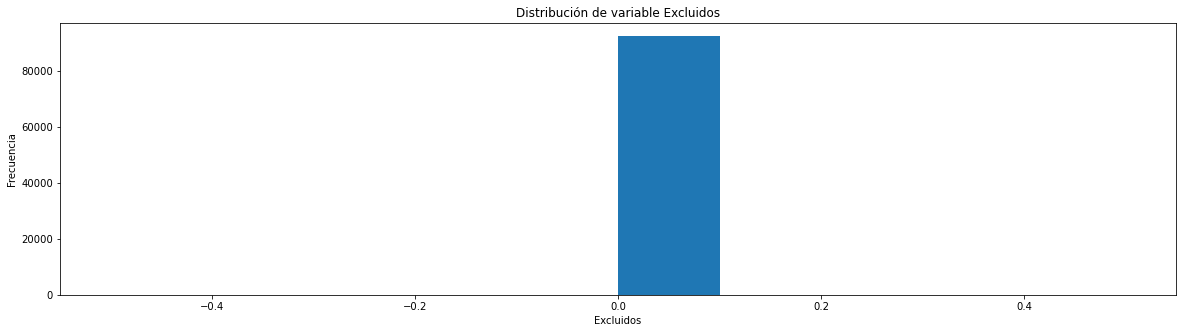

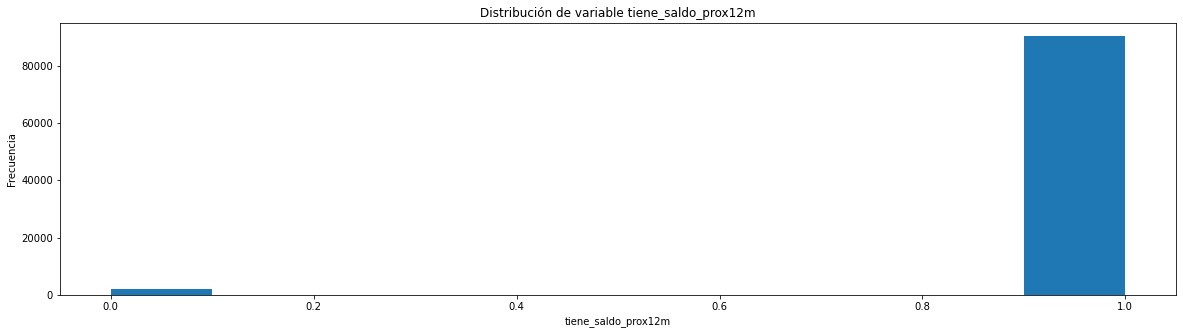

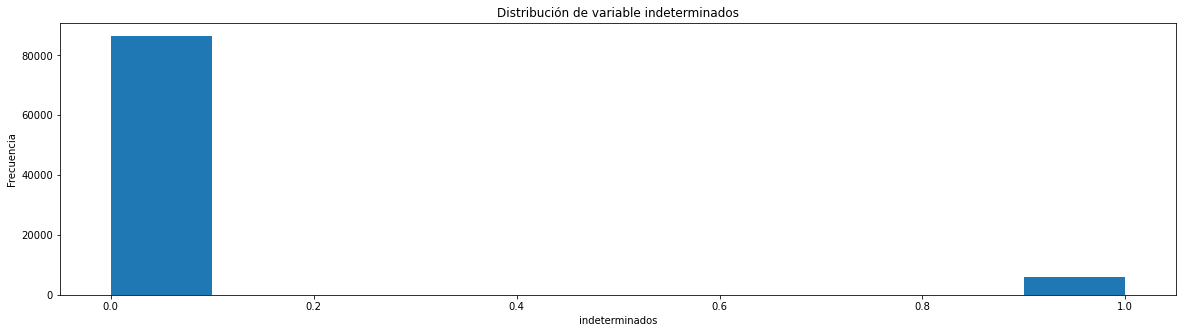

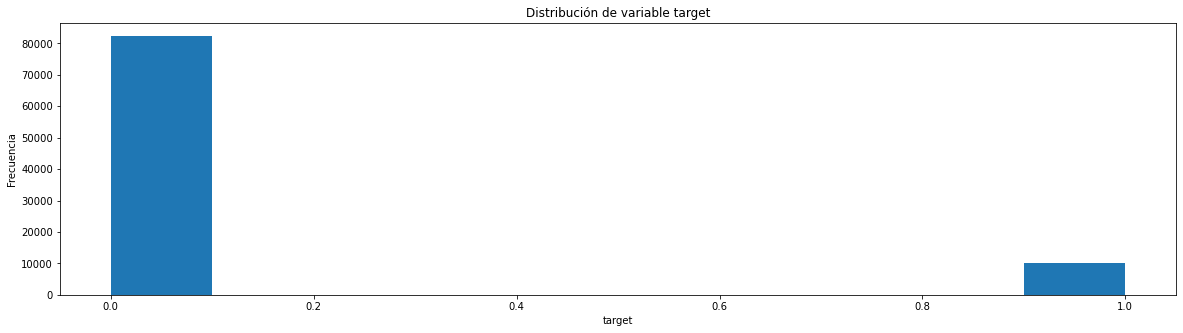

In [22]:
for var in numbase : 
    fig = plt.figure(figsize =(20, 5))

    plt.hist(data=base, x=var, bins = 10)
    plt.title(f'Distribución de variable {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

In [33]:
# Se añaden gráficos de dispersión 

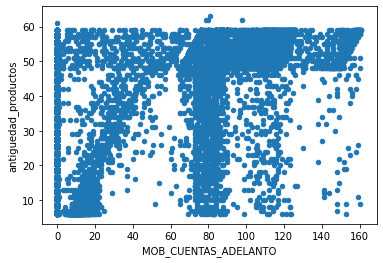

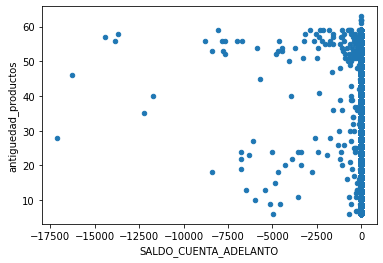

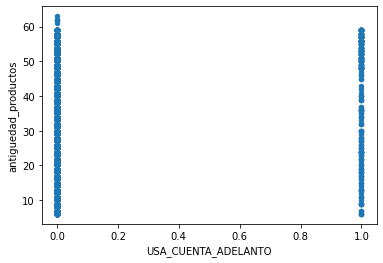

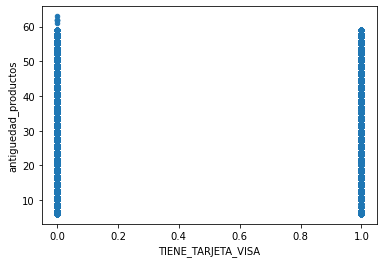

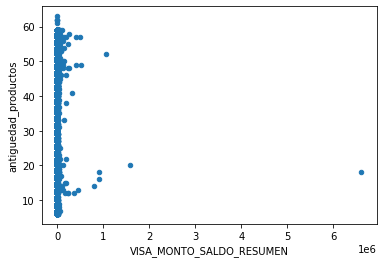

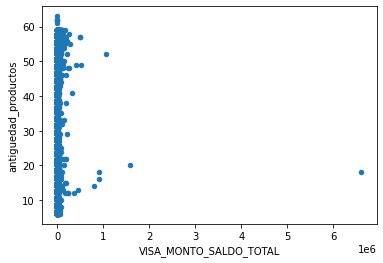

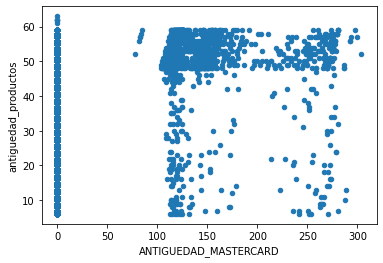

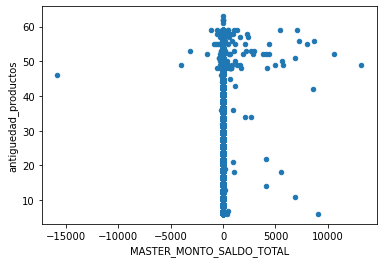

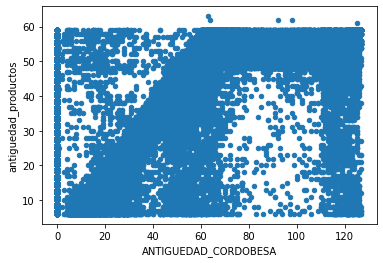

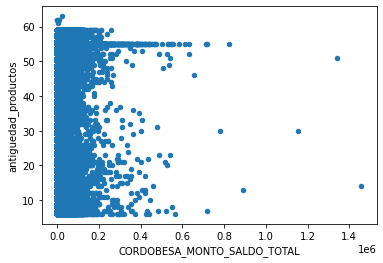

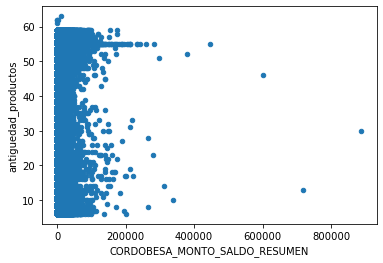

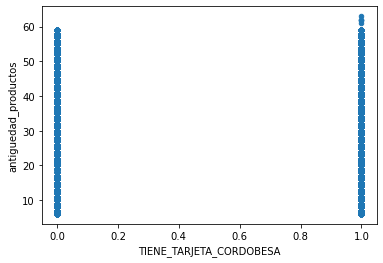

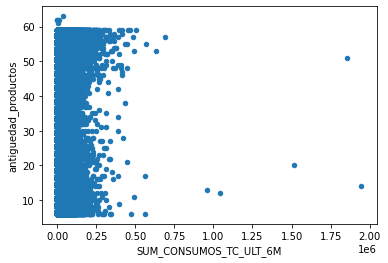

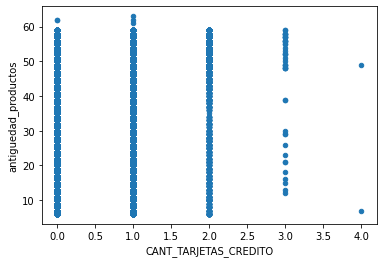

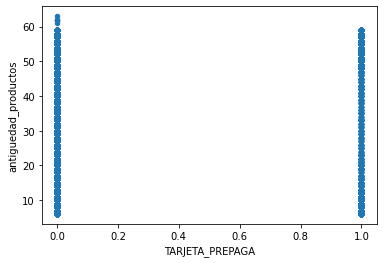

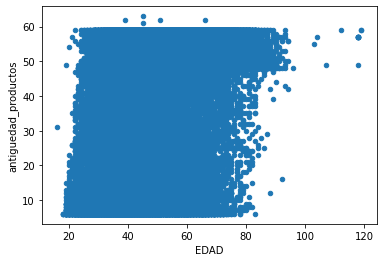

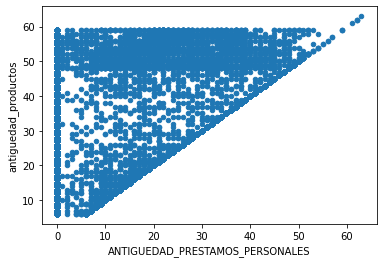

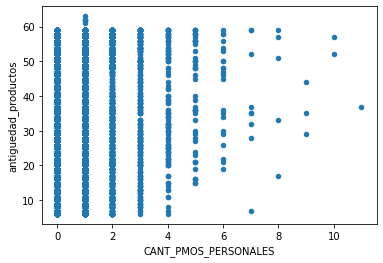

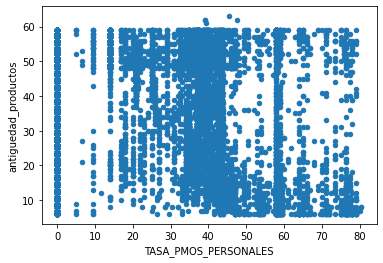

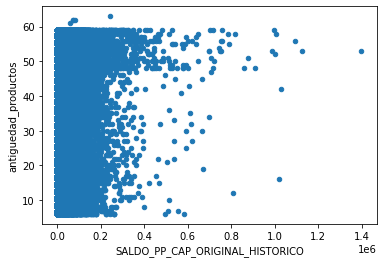

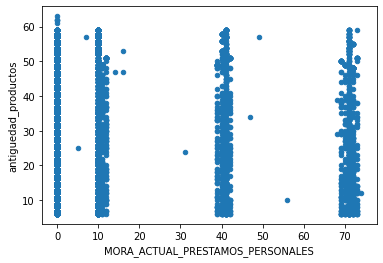

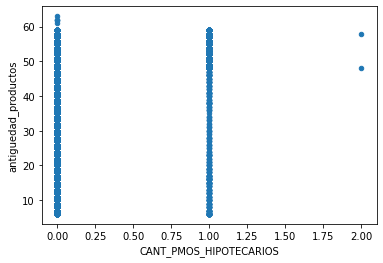

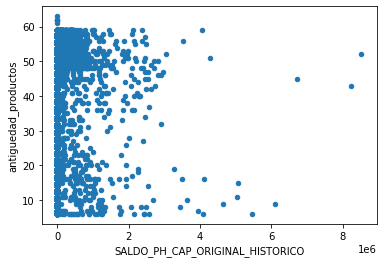

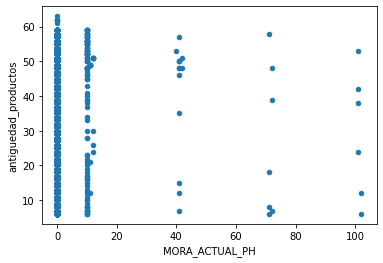

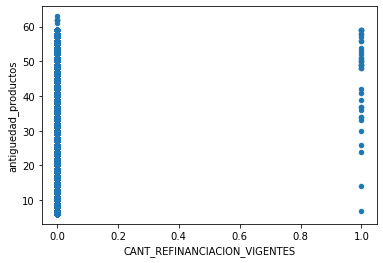

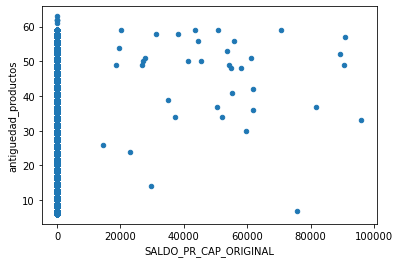

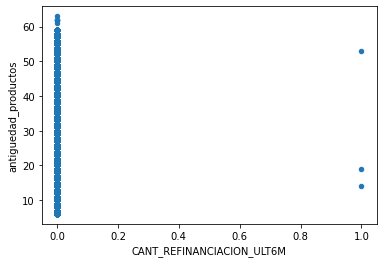

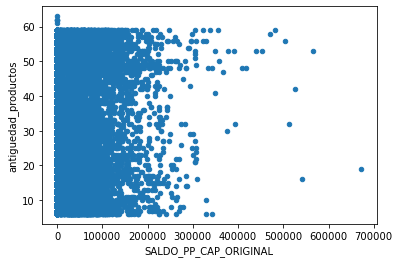

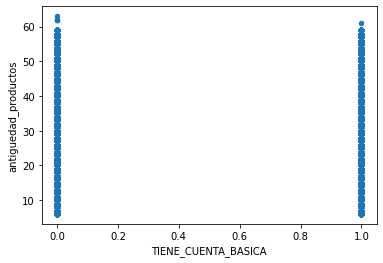

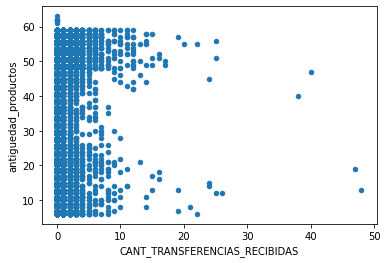

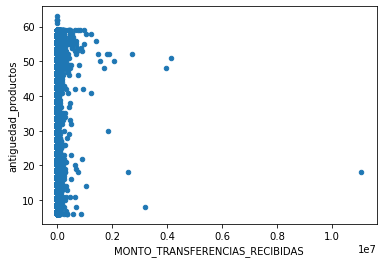

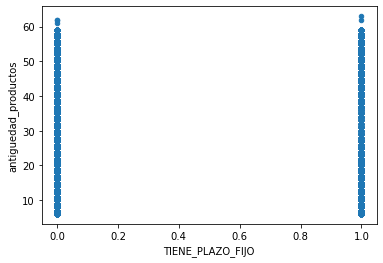

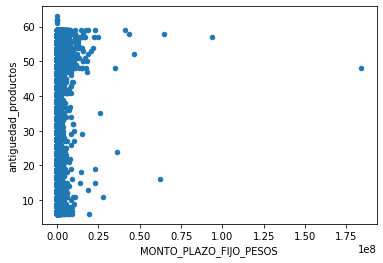

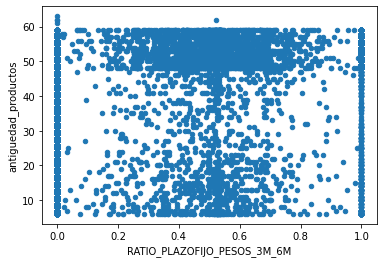

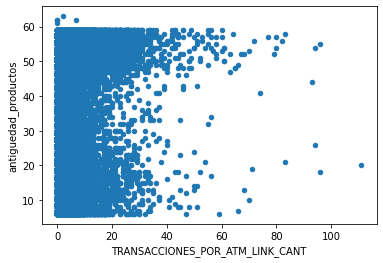

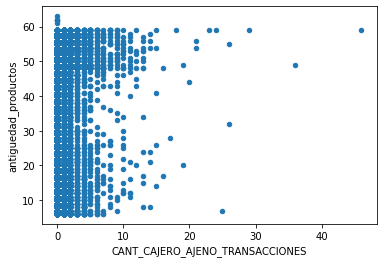

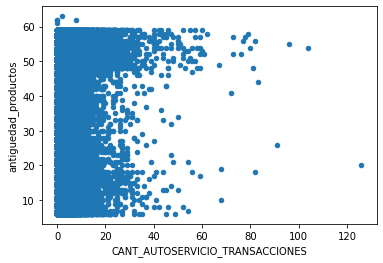

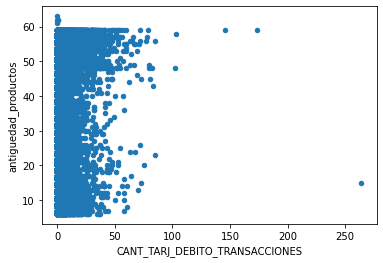

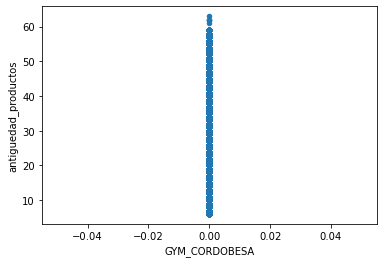

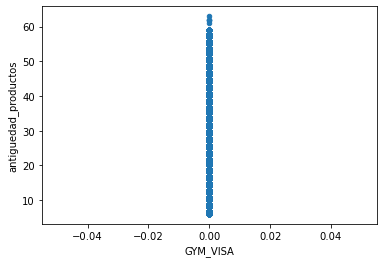

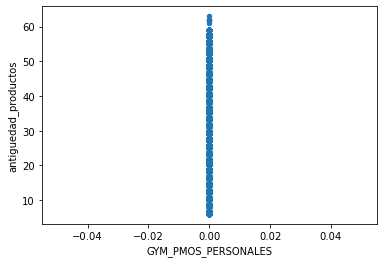

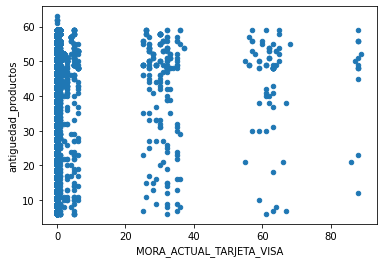

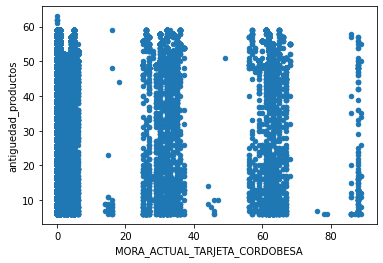

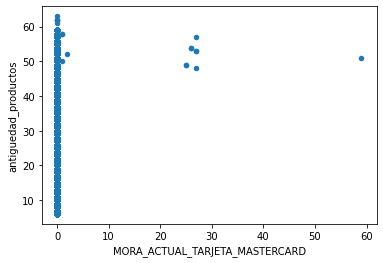

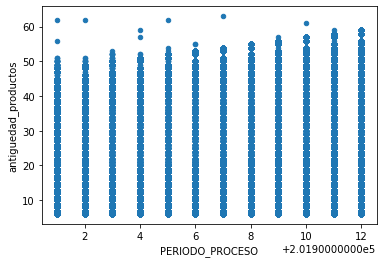

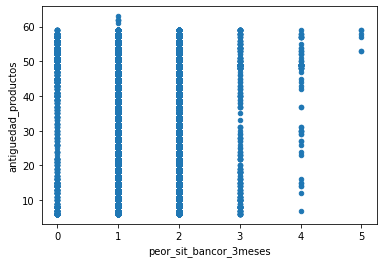

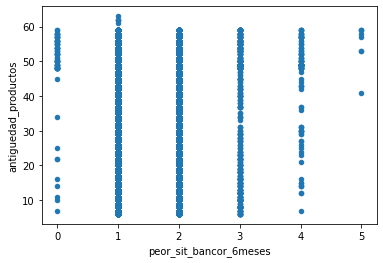

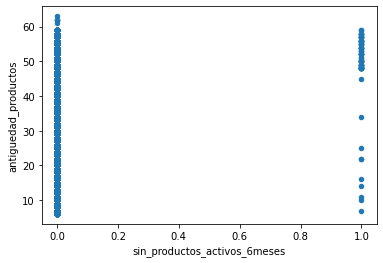

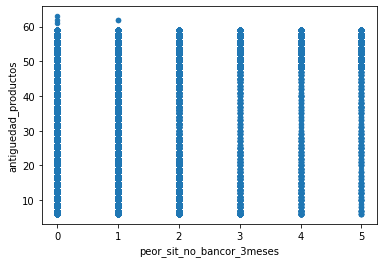

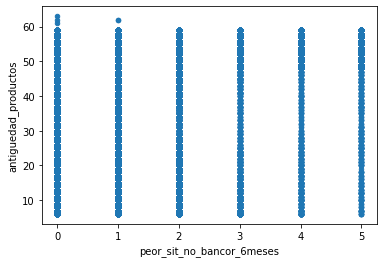

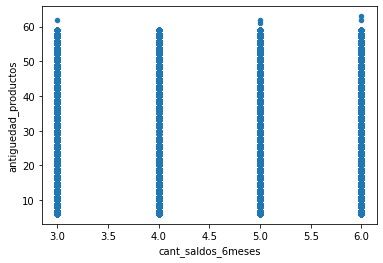

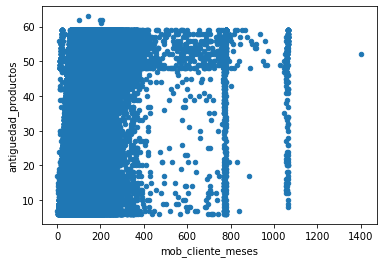

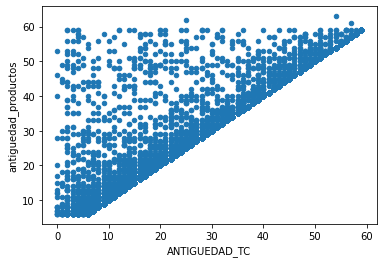

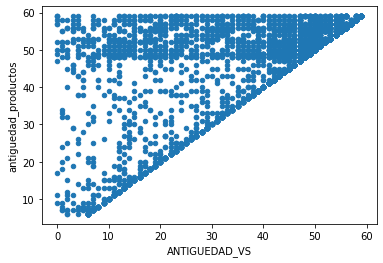

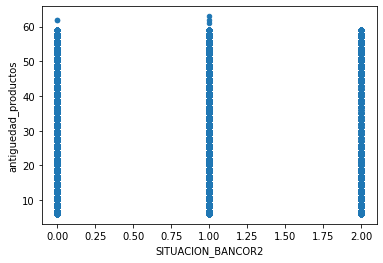

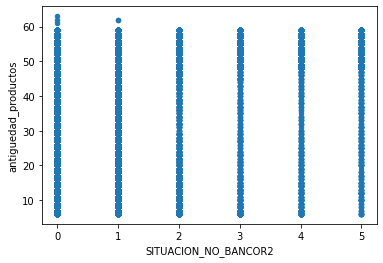

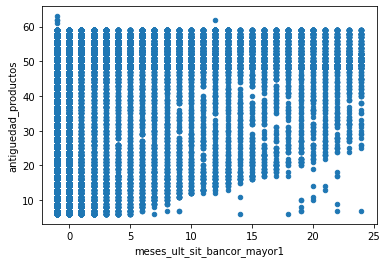

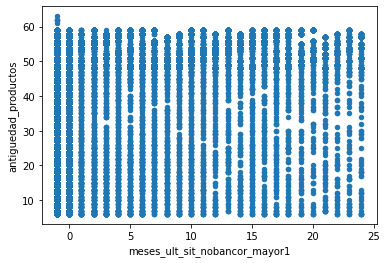

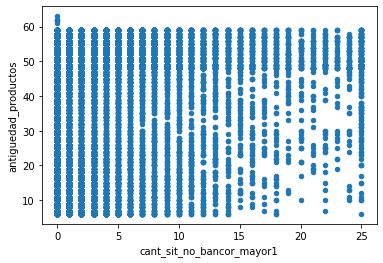

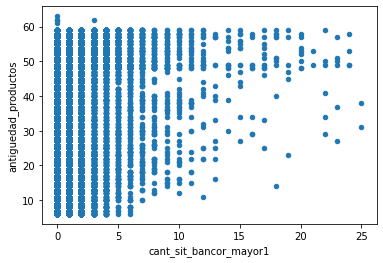

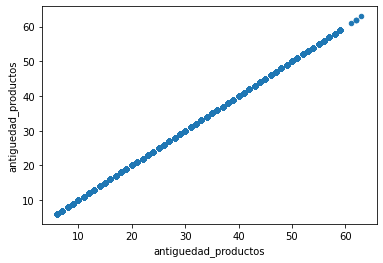

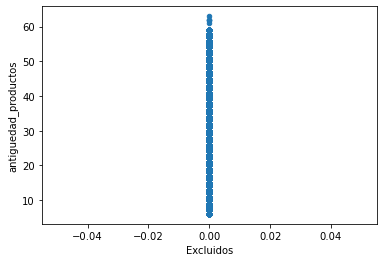

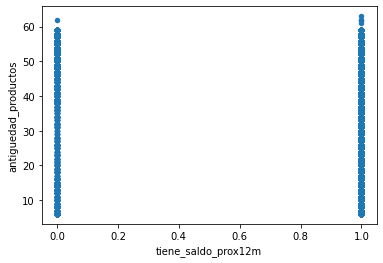

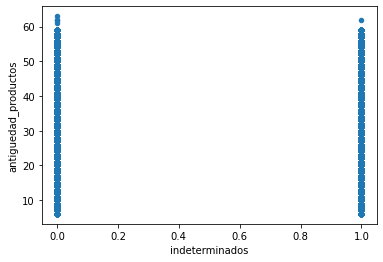

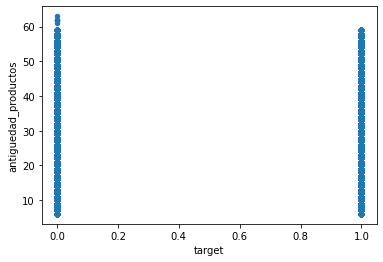

In [35]:
for x in numbase:
    numbase.plot.scatter(x,'antiguedad_productos')

In [104]:
# Vemos si la base posee valores faltantes
for x in base:
    if base[x].isnull().values.any():
        print("La variable : " + x +" tiene valores faltantes")

La variable : mob_cliente_meses tiene valores faltantes
La variable : ANTIGUEDAD_TC tiene valores faltantes
La variable : ANTIGUEDAD_VS tiene valores faltantes
